In [ ]:
%pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.0/613.0 kB 7.2 MB/s eta 0:00:00


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.154 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Setup complete ✅ (4 CPUs, 25.5 GB RAM, 26.3/166.8 GB disk)


In [ ]:
from ultralytics import YOLO

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 82.1MB/s]


In [ ]:
results = model.train(data='/content/drive/MyDrive/Object_Detect/data.yaml', epochs=20)

Ultralytics YOLOv8.0.154 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Object_Detect/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=F

In [ ]:
model2 = YOLO('yolov8n.pt')

In [ ]:
results = model.val()

Ultralytics YOLOv8.0.154 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 3010328 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/Object_Detect/valid/labels.cache... 9 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9/9 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]
                   all          9        103          0          0          0          0
Speed: 0.2ms preprocess, 16.3ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/val


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/Dataset_Place_Recognization/spaceData.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   space       11 non-null     object 
 1   latitude    11 non-null     float64
 2   longitude   11 non-null     float64
 3   w01         11 non-null     int64  
 4   w02         11 non-null     int64  
 5   w03         11 non-null     int64  
 6   w04         11 non-null     int64  
 7   folderPath  11 non-null     object 
dtypes: float64(2), int64(4), object(2)
memory usage: 832.0+ bytes


In [ ]:
import os
roomsObj = []

for i in range(len(df)):
  oneRoomObj = set()
  folder_dir = "/content/drive/MyDrive/Dataset_Place_Recognization"+df['folderPath'][i]
  for images in os.listdir(folder_dir):
    # check if the image ends with png
    if (images.endswith(".jpg")):
        print(folder_dir+"/"+images)
        results2 = model2.predict(source=folder_dir+"/"+images,save=True)
        results = model.predict(source=folder_dir+"/"+images,save=True)
        for i in range(len(results[0].boxes.cls)):
          oneRoomObj.add(results[0].names[int(results[0].boxes.cls[i])])
        for i in range(len(results2[0].boxes.cls)):
          oneRoomObj.add(results2[0].names[int(results2[0].boxes.cls[i])])
  roomsObj.append(" ".join(oneRoomObj))
df['objects'] = roomsObj


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/gmtechLab/2.jpg: 640x640 12 chairs, 1 laptop, 1 mouse, 11.8ms
Speed: 5.9ms preprocess, 11.8ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/gmtechLab/2.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/gmtechLab/2.jpg: 640x640 (no detections), 6.4ms
Speed: 3.9ms preprocess, 6.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/gmtechLab/1.jpg: 640x640 1 person, 18 chairs, 1 tv, 1 remote, 6.4ms
Speed: 3.4ms preprocess, 6.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/gmtechLab/1.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/gmtechLab/1.jpg: 640x640 (no detections), 6.5ms
Speed: 3.4ms preprocess, 6.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/gmtechLab/3.jpg: 640x640 5 chairs, 1 tv, 1 laptop, 3 keyboards, 6.9ms
Speed: 4.5ms preprocess, 6.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/gmtechLab/3.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/gmtechLab/3.jpg: 640x640 (no detections), 8.6ms
Speed: 3.8ms preprocess, 8.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/gmtechLab/5.jpg: 640x640 1 chair, 1 tv, 7.7ms
Speed: 3.6ms preprocess, 7.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/gmtechLab/5.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/gmtechLab/5.jpg: 640x640 (no detections), 8.2ms
Speed: 3.4ms preprocess, 8.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict5

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/gmtechLab/4.jpg: 640x640 2 chairs, 3 tvs, 2 laptops, 1 mouse, 2 keyboards, 6.5ms
Speed: 3.3ms preprocess, 6.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/gmtechLab/4.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/gmtechLab/4.jpg: 640x640 (no detections), 6.8ms
Speed: 3.3ms preprocess, 6.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict6

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/gmtechLab/7.jpg: 640x640 5 chairs, 1 dining table, 7.1ms
Speed: 3.2ms preprocess, 7.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/gmtechLab/7.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/gmtechLab/7.jpg: 640x640 (no detections), 6.2ms
Speed: 3.4ms preprocess, 6.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict7

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/gmtechLab/6.jpg: 640x640 5 chairs, 1 dining table, 6.5ms
Speed: 3.4ms preprocess, 6.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/gmtechLab/6.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/gmtechLab/6.jpg: 640x640 (no detections), 6.9ms
Speed: 3.3ms preprocess, 6.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict8

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/gmtechLab/8.jpg: 640x640 2 persons, 1 cup, 5 chairs, 1 dining table, 1 laptop, 1 mouse, 6.5ms
Speed: 3.4ms preprocess, 6.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/gmtechLab/8.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/gmtechLab/8.jpg: 640x640 (no detections), 6.8ms
Speed: 3.5ms preprocess, 6.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict9

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/mtechLab/1.jpg: 640x640 2 persons, 1 backpack, 1 suitcase, 1 bottle, 2 chairs, 2 tvs, 2 laptops, 4 keyboards, 6.6ms
Speed: 3.4ms preprocess, 6.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/mtechLab/1.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/mtechLab/1.jpg: 640x640 (no detections), 6.5ms
Speed: 3.4ms preprocess, 6.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict10

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/mtechLab/3.jpg: 640x640 2 chairs, 2 tvs, 1 laptop, 1 mouse, 3 keyboards, 6.4ms
Speed: 3.5ms preprocess, 6.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/mtechLab/3.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/mtechLab/3.jpg: 640x640 (no detections), 6.1ms
Speed: 3.3ms preprocess, 6.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict11

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/mtechLab/2.jpg: 640x640 5 chairs, 3 tvs, 1 laptop, 3 keyboards, 6.2ms
Speed: 3.2ms preprocess, 6.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/mtechLab/2.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/mtechLab/2.jpg: 640x640 (no detections), 6.1ms
Speed: 3.1ms preprocess, 6.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict12

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/mtechLab/5.jpg: 640x640 1 umbrella, 1 chair, 1 dining table, 3 tvs, 1 laptop, 3 mouses, 3 keyboards, 6.2ms
Speed: 3.4ms preprocess, 6.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/mtechLab/5.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/mtechLab/5.jpg: 640x640 (no detections), 6.4ms
Speed: 3.4ms preprocess, 6.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict13

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/mtechLab/4.jpg: 640x640 3 chairs, 3 tvs, 2 laptops, 2 keyboards, 6.1ms
Speed: 3.1ms preprocess, 6.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/mtechLab/4.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/mtechLab/4.jpg: 640x640 (no detections), 6.3ms
Speed: 3.2ms preprocess, 6.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict14

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/mtechLab/6.jpg: 640x640 5 chairs, 8 tvs, 6 laptops, 2 keyboards, 6.1ms
Speed: 3.4ms preprocess, 6.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/mtechLab/6.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/mtechLab/6.jpg: 640x640 (no detections), 6.2ms
Speed: 3.3ms preprocess, 6.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict15

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/mtechLab/7.jpg: 640x640 1 bottle, 4 chairs, 5 tvs, 2 laptops, 1 keyboard, 6.2ms
Speed: 3.4ms preprocess, 6.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/mtechLab/7.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/mtechLab/7.jpg: 640x640 (no detections), 6.5ms
Speed: 3.3ms preprocess, 6.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict16

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/mtechLab/8.jpg: 640x640 2 persons, 8 chairs, 1 dining table, 2 tvs, 8 laptops, 3 keyboards, 6.7ms
Speed: 3.6ms preprocess, 6.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/mtechLab/8.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/mtechLab/8.jpg: 640x640 (no detections), 8.2ms
Speed: 3.4ms preprocess, 8.2ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict17

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/roboticsLab/WhatsApp Image 2023-07-23 at 16.58.03.jpg: 640x640 8 chairs, 1 dining table, 7.1ms
Speed: 3.4ms preprocess, 7.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/roboticsLab/WhatsApp Image 2023-07-23 at 16.58.03.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/roboticsLab/WhatsApp Image 2023-07-23 at 16.58.03.jpg: 640x640 (no detections), 6.1ms
Speed: 3.2ms preprocess, 6.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict18

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/roboticsLab/WhatsApp Image 2023-07-23 at 16.58.11.jpg: 640x640 1 cup, 6 chairs, 1 tv, 1 remote, 6.6ms
Speed: 3.3ms preprocess, 6.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/roboticsLab/WhatsApp Image 2023-07-23 at 16.58.11.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/roboticsLab/WhatsApp Image 2023-07-23 at 16.58.11.jpg: 640x640 (no detections), 6.3ms
Speed: 3.4ms preprocess, 6.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict19

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/roboticsLab/WhatsApp Image 2023-07-23 at 16.58.14.jpg: 640x640 10 chairs, 1 dining table, 1 tv, 1 book, 6.6ms
Speed: 3.4ms preprocess, 6.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/roboticsLab/WhatsApp Image 2023-07-23 at 16.58.14.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/roboticsLab/WhatsApp Image 2023-07-23 at 16.58.14.jpg: 640x640 (no detections), 6.0ms
Speed: 3.3ms preprocess, 6.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict20

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/roboticsLab/WhatsApp Image 2023-07-23 at 16.58.13 2.jpg: 640x640 1 person, 3 bottles, 7 chairs, 2 dining tables, 2 tvs, 1 laptop, 1 keyboard, 1 clock, 6.5ms
Speed: 3.5ms preprocess, 6.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/roboticsLab/WhatsApp Image 2023-07-23 at 16.58.13 2.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/roboticsLab/WhatsApp Image 2023-07-23 at 16.58.13 2.jpg: 640x640 (no detections), 6.5ms
Speed: 3.5ms preprocess, 6.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict21

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/roboticsLab/WhatsApp Image 2023-07-23 at 16.58.13.jpg: 640x640 1 bottle, 5 chairs, 2 potted plants, 4 tvs, 6.6ms
Speed: 3.4ms preprocess, 6.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/roboticsLab/WhatsApp Image 2023-07-23 at 16.58.13.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/roboticsLab/WhatsApp Image 2023-07-23 at 16.58.13.jpg: 640x640 (no detections), 6.6ms
Speed: 3.2ms preprocess, 6.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict22

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/roboticsLab/WhatsApp Image 2023-07-23 at 16.58.14 2.jpg: 640x640 4 chairs, 1 tv, 1 laptop, 2 keyboards, 6.7ms
Speed: 3.5ms preprocess, 6.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/roboticsLab/WhatsApp Image 2023-07-23 at 16.58.14 2.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/roboticsLab/WhatsApp Image 2023-07-23 at 16.58.14 2.jpg: 640x640 (no detections), 6.3ms
Speed: 3.2ms preprocess, 6.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict23

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/roboticsLab/WhatsApp Image 2023-07-23 at 16.58.15.jpg: 640x640 2 chairs, 1 tv, 1 keyboard, 6.5ms
Speed: 3.3ms preprocess, 6.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/roboticsLab/WhatsApp Image 2023-07-23 at 16.58.15.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/roboticsLab/WhatsApp Image 2023-07-23 at 16.58.15.jpg: 640x640 (no detections), 6.6ms
Speed: 3.4ms preprocess, 6.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict24

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/roboticsLab/WhatsApp Image 2023-07-23 at 16.58.20.jpg: 640x640 1 bottle, 2 chairs, 1 tv, 1 mouse, 1 keyboard, 6.2ms
Speed: 3.3ms preprocess, 6.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/roboticsLab/WhatsApp Image 2023-07-23 at 16.58.20.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/roboticsLab/WhatsApp Image 2023-07-23 at 16.58.20.jpg: 640x640 (no detections), 6.6ms
Speed: 3.4ms preprocess, 6.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict25

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/roboticsLobby/WhatsApp Image 2023-07-23 at 16.59.49.jpg: 640x640 (no detections), 6.3ms
Speed: 3.3ms preprocess, 6.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/roboticsLobby/WhatsApp Image 2023-07-23 at 16.59.49.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/roboticsLobby/WhatsApp Image 2023-07-23 at 16.59.49.jpg: 640x640 (no detections), 6.8ms
Speed: 3.3ms preprocess, 6.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict26

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/roboticsLobby/WhatsApp Image 2023-07-23 at 16.59.53.jpg: 640x640 1 toilet, 6.6ms
Speed: 3.3ms preprocess, 6.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/roboticsLobby/WhatsApp Image 2023-07-23 at 16.59.53.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/roboticsLobby/WhatsApp Image 2023-07-23 at 16.59.53.jpg: 640x640 (no detections), 6.6ms
Speed: 3.8ms preprocess, 6.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict27

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/roboticsLobby/WhatsApp Image 2023-07-23 at 17.00.00 2.jpg: 640x640 1 bottle, 6.1ms
Speed: 3.1ms preprocess, 6.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/roboticsLobby/WhatsApp Image 2023-07-23 at 17.00.00 2.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/roboticsLobby/WhatsApp Image 2023-07-23 at 17.00.00 2.jpg: 640x640 (no detections), 6.3ms
Speed: 3.4ms preprocess, 6.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict28

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/roboticsLobby/WhatsApp Image 2023-07-23 at 16.59.59.jpg: 640x640 (no detections), 9.8ms
Speed: 5.6ms preprocess, 9.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/roboticsLobby/WhatsApp Image 2023-07-23 at 16.59.59.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/roboticsLobby/WhatsApp Image 2023-07-23 at 16.59.59.jpg: 640x640 (no detections), 6.3ms
Speed: 3.3ms preprocess, 6.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict29

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/roboticsLobby/WhatsApp Image 2023-07-23 at 17.00.00.jpg: 640x640 (no detections), 6.6ms
Speed: 3.6ms preprocess, 6.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/roboticsLobby/WhatsApp Image 2023-07-23 at 17.00.00.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/roboticsLobby/WhatsApp Image 2023-07-23 at 17.00.00.jpg: 640x640 (no detections), 6.7ms
Speed: 3.5ms preprocess, 6.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict30

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/roboticsLobby/WhatsApp Image 2023-07-23 at 16.59.59 2.jpg: 640x640 (no detections), 6.5ms
Speed: 3.3ms preprocess, 6.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/roboticsLobby/WhatsApp Image 2023-07-23 at 16.59.59 2.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/roboticsLobby/WhatsApp Image 2023-07-23 at 16.59.59 2.jpg: 640x640 (no detections), 6.2ms
Speed: 3.2ms preprocess, 6.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict31

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/roboticsLobby/WhatsApp Image 2023-07-23 at 17.00.01 2.jpg: 640x640 (no detections), 6.8ms
Speed: 3.6ms preprocess, 6.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/roboticsLobby/WhatsApp Image 2023-07-23 at 17.00.01 2.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/roboticsLobby/WhatsApp Image 2023-07-23 at 17.00.01 2.jpg: 640x640 (no detections), 6.4ms
Speed: 3.3ms preprocess, 6.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict32

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/roboticsLobby/WhatsApp Image 2023-07-23 at 17.00.01.jpg: 640x640 (no detections), 6.7ms
Speed: 3.4ms preprocess, 6.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/roboticsLobby/WhatsApp Image 2023-07-23 at 17.00.01.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/roboticsLobby/WhatsApp Image 2023-07-23 at 17.00.01.jpg: 640x640 (no detections), 6.3ms
Speed: 3.3ms preprocess, 6.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict33

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/mtechLobby/WhatsApp Image 2023-07-23 at 17.02.13.jpg: 640x640 1 person, 6.5ms
Speed: 3.5ms preprocess, 6.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/mtechLobby/WhatsApp Image 2023-07-23 at 17.02.13.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/mtechLobby/WhatsApp Image 2023-07-23 at 17.02.13.jpg: 640x640 (no detections), 6.5ms
Speed: 3.3ms preprocess, 6.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict34

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/mtechLobby/WhatsApp Image 2023-07-23 at 17.02.40.jpg: 640x640 1 train, 6.7ms
Speed: 3.6ms preprocess, 6.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/mtechLobby/WhatsApp Image 2023-07-23 at 17.02.40.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/mtechLobby/WhatsApp Image 2023-07-23 at 17.02.40.jpg: 640x640 (no detections), 7.5ms
Speed: 3.8ms preprocess, 7.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict35

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/mtechLobby/WhatsApp Image 2023-07-23 at 17.02.42.jpg: 640x640 (no detections), 7.1ms
Speed: 3.7ms preprocess, 7.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/mtechLobby/WhatsApp Image 2023-07-23 at 17.02.42.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/mtechLobby/WhatsApp Image 2023-07-23 at 17.02.42.jpg: 640x640 (no detections), 6.8ms
Speed: 3.5ms preprocess, 6.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict36

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/mtechLobby/WhatsApp Image 2023-07-23 at 17.02.56.jpg: 640x640 (no detections), 6.4ms
Speed: 3.4ms preprocess, 6.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/mtechLobby/WhatsApp Image 2023-07-23 at 17.02.56.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/mtechLobby/WhatsApp Image 2023-07-23 at 17.02.56.jpg: 640x640 (no detections), 6.4ms
Speed: 3.3ms preprocess, 6.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict37

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/mtechLobby/WhatsApp Image 2023-07-23 at 17.02.55.jpg: 640x640 1 sink, 6.2ms
Speed: 3.3ms preprocess, 6.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/mtechLobby/WhatsApp Image 2023-07-23 at 17.02.55.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/mtechLobby/WhatsApp Image 2023-07-23 at 17.02.55.jpg: 640x640 (no detections), 6.4ms
Speed: 3.5ms preprocess, 6.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict38

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/mtechLobby/WhatsApp Image 2023-07-23 at 17.03.02.jpg: 640x640 (no detections), 6.5ms
Speed: 3.5ms preprocess, 6.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/mtechLobby/WhatsApp Image 2023-07-23 at 17.03.02.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/mtechLobby/WhatsApp Image 2023-07-23 at 17.03.02.jpg: 640x640 (no detections), 6.8ms
Speed: 3.8ms preprocess, 6.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict39

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/mtechLobby/WhatsApp Image 2023-07-23 at 17.03.02 2.jpg: 640x640 1 tv, 6.4ms
Speed: 3.4ms preprocess, 6.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/mtechLobby/WhatsApp Image 2023-07-23 at 17.03.02 2.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/mtechLobby/WhatsApp Image 2023-07-23 at 17.03.02 2.jpg: 640x640 (no detections), 6.3ms
Speed: 3.2ms preprocess, 6.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict40

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/mtechLobby/WhatsApp Image 2023-07-23 at 17.03.01.jpg: 640x640 1 bottle, 6.5ms
Speed: 3.5ms preprocess, 6.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/mtechLobby/WhatsApp Image 2023-07-23 at 17.03.01.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/mtechLobby/WhatsApp Image 2023-07-23 at 17.03.01.jpg: 640x640 (no detections), 6.5ms
Speed: 3.4ms preprocess, 6.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict41

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/vlsiLab/WhatsApp Image 2023-08-13 at 17.54.302.jpg: 640x640 2 chairs, 1 tv, 1 keyboard, 6.6ms
Speed: 3.4ms preprocess, 6.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/vlsiLab/WhatsApp Image 2023-08-13 at 17.54.302.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/vlsiLab/WhatsApp Image 2023-08-13 at 17.54.302.jpg: 640x640 (no detections), 6.3ms
Speed: 3.2ms preprocess, 6.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict42

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/vlsiLab/WhatsApp Image 2023-08-13 at 17.54.312.jpg: 640x640 1 mouse, 8.3ms
Speed: 3.4ms preprocess, 8.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/vlsiLab/WhatsApp Image 2023-08-13 at 17.54.312.jpg: 640x640 (no detections), 7.8ms
Speed: 3.4ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


/content/drive/MyDrive/Dataset_Place_Recognization/vlsiLab/WhatsApp Image 2023-08-13 at 17.54.312.jpg


Results saved to runs/detect/predict43

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/vlsiLab/WhatsApp Image 2023-08-13 at 17.54.30.jpg: 640x640 1 refrigerator, 7.9ms
Speed: 3.4ms preprocess, 7.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/vlsiLab/WhatsApp Image 2023-08-13 at 17.54.30.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/vlsiLab/WhatsApp Image 2023-08-13 at 17.54.30.jpg: 640x640 (no detections), 7.2ms
Speed: 4.0ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict44

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/vlsiLab/WhatsApp Image 2023-08-13 at 17.54.27.jpg: 640x640 1 person, 1 bottle, 6 chairs, 1 tv, 2 laptops, 6.6ms
Speed: 3.2ms preprocess, 6.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/vlsiLab/WhatsApp Image 2023-08-13 at 17.54.27.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/vlsiLab/WhatsApp Image 2023-08-13 at 17.54.27.jpg: 640x640 (no detections), 6.5ms
Speed: 3.3ms preprocess, 6.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict45

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/vlsiLab/WhatsApp Image 2023-08-13 at 17.54.33.jpg: 640x640 2 persons, 1 bottle, 6 chairs, 2 tvs, 2 laptops, 1 keyboard, 8.8ms
Speed: 5.1ms preprocess, 8.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/vlsiLab/WhatsApp Image 2023-08-13 at 17.54.33.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/vlsiLab/WhatsApp Image 2023-08-13 at 17.54.33.jpg: 640x640 (no detections), 6.4ms
Speed: 3.3ms preprocess, 6.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict46

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/vlsiLab/WhatsApp Image 2023-08-13 at 17.54.322.jpg: 640x640 1 bottle, 3 chairs, 1 tv, 1 keyboard, 7.7ms
Speed: 3.3ms preprocess, 7.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/vlsiLab/WhatsApp Image 2023-08-13 at 17.54.322.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/vlsiLab/WhatsApp Image 2023-08-13 at 17.54.322.jpg: 640x640 (no detections), 6.7ms
Speed: 3.7ms preprocess, 6.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict47

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/vlsiLab/WhatsApp Image 2023-08-13 at 17.54.28.jpg: 640x640 4 chairs, 1 tv, 2 laptops, 1 mouse, 3 keyboards, 7.0ms
Speed: 3.7ms preprocess, 7.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/vlsiLab/WhatsApp Image 2023-08-13 at 17.54.28.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/vlsiLab/WhatsApp Image 2023-08-13 at 17.54.28.jpg: 640x640 (no detections), 9.1ms
Speed: 4.2ms preprocess, 9.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict48

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/vlsiLab/WhatsApp Image 2023-08-13 at 17.54.31.jpg: 640x640 (no detections), 6.2ms
Speed: 3.1ms preprocess, 6.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/vlsiLab/WhatsApp Image 2023-08-13 at 17.54.31.jpg: 640x640 (no detections), 6.7ms
Speed: 3.2ms preprocess, 6.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict49



/content/drive/MyDrive/Dataset_Place_Recognization/vlsiLab/WhatsApp Image 2023-08-13 at 17.54.31.jpg
/content/drive/MyDrive/Dataset_Place_Recognization/vlsiLab/WhatsApp Image 2023-08-13 at 17.54.32.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/vlsiLab/WhatsApp Image 2023-08-13 at 17.54.32.jpg: 640x640 4 tvs, 1 laptop, 1 mouse, 1 keyboard, 13.3ms
Speed: 4.5ms preprocess, 13.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/vlsiLab/WhatsApp Image 2023-08-13 at 17.54.32.jpg: 640x640 (no detections), 7.2ms
Speed: 4.9ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict50

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/vlsiLab/WhatsApp Image 2023-08-13 at 17.54.313.jpg: 640x640 3 tvs, 1 keyboard, 8.3ms
Speed: 3.4ms preprocess, 8.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/vlsiLab/WhatsApp Image 2023-08-13 at 17.54.313.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/vlsiLab/WhatsApp Image 2023-08-13 at 17.54.313.jpg: 640x640 (no detections), 6.6ms
Speed: 3.6ms preprocess, 6.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict51

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/vlsiDesignLab/WhatsApp Image 2023-08-13 at 17.55.20.jpg: 640x640 6 chairs, 1 tv, 3 laptops, 6.6ms
Speed: 3.4ms preprocess, 6.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/vlsiDesignLab/WhatsApp Image 2023-08-13 at 17.55.20.jpg: 640x640 (no detections), 6.6ms
Speed: 3.5ms preprocess, 6.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict52



/content/drive/MyDrive/Dataset_Place_Recognization/vlsiDesignLab/WhatsApp Image 2023-08-13 at 17.55.20.jpg
/content/drive/MyDrive/Dataset_Place_Recognization/vlsiDesignLab/WhatsApp Image 2023-08-13 at 17.55.193.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/vlsiDesignLab/WhatsApp Image 2023-08-13 at 17.55.193.jpg: 640x640 1 backpack, 4 chairs, 2 tvs, 2 laptops, 1 mouse, 6.3ms
Speed: 3.8ms preprocess, 6.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/vlsiDesignLab/WhatsApp Image 2023-08-13 at 17.55.193.jpg: 640x640 (no detections), 6.3ms
Speed: 3.2ms preprocess, 6.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict53

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/vlsiDesignLab/WhatsApp Image 2023-08-13 at 17.55.182.jpg: 640x640 1 bottle, 1 chair, 2 tvs, 1 mouse, 1 keyboard, 6.5ms
Speed: 3.4ms preprocess, 6.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/vlsiDesignLab/WhatsApp Image 2023-08-13 at 17.55.182.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/vlsiDesignLab/WhatsApp Image 2023-08-13 at 17.55.182.jpg: 640x640 (no detections), 6.9ms
Speed: 3.5ms preprocess, 6.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict54

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/vlsiDesignLab/WhatsApp Image 2023-08-13 at 17.55.18.jpg: 640x640 2 chairs, 2 tvs, 1 mouse, 2 keyboards, 6.3ms
Speed: 3.4ms preprocess, 6.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/vlsiDesignLab/WhatsApp Image 2023-08-13 at 17.55.18.jpg: 640x640 (no detections), 5.9ms
Speed: 3.2ms preprocess, 5.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict55


/content/drive/MyDrive/Dataset_Place_Recognization/vlsiDesignLab/WhatsApp Image 2023-08-13 at 17.55.18.jpg



image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/vlsiDesignLab/WhatsApp Image 2023-08-13 at 17.55.173.jpg: 640x640 1 bottle, 1 chair, 3 tvs, 2 mouses, 2 keyboards, 1 book, 6.8ms
Speed: 3.3ms preprocess, 6.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/vlsiDesignLab/WhatsApp Image 2023-08-13 at 17.55.173.jpg: 640x640 (no detections), 6.5ms
Speed: 3.3ms preprocess, 6.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


/content/drive/MyDrive/Dataset_Place_Recognization/vlsiDesignLab/WhatsApp Image 2023-08-13 at 17.55.173.jpg


Results saved to runs/detect/predict56

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/vlsiDesignLab/WhatsApp Image 2023-08-13 at 17.55.172.jpg: 640x640 3 chairs, 1 tv, 1 laptop, 6.5ms
Speed: 3.4ms preprocess, 6.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/vlsiDesignLab/WhatsApp Image 2023-08-13 at 17.55.172.jpg: 640x640 (no detections), 6.4ms
Speed: 3.4ms preprocess, 6.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict57



/content/drive/MyDrive/Dataset_Place_Recognization/vlsiDesignLab/WhatsApp Image 2023-08-13 at 17.55.172.jpg
/content/drive/MyDrive/Dataset_Place_Recognization/vlsiDesignLab/WhatsApp Image 2023-08-13 at 17.55.19.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/vlsiDesignLab/WhatsApp Image 2023-08-13 at 17.55.19.jpg: 640x640 1 suitcase, 1 chair, 6.3ms
Speed: 3.3ms preprocess, 6.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/vlsiDesignLab/WhatsApp Image 2023-08-13 at 17.55.19.jpg: 640x640 (no detections), 6.1ms
Speed: 3.2ms preprocess, 6.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict58

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/vlsiDesignLab/WhatsApp Image 2023-08-13 at 17.55.17.jpg: 640x640 2 persons, 5 chairs, 2 tvs, 3 laptops, 6.1ms
Speed: 3.2ms preprocess, 6.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/vlsiDesignLab/WhatsApp Image 2023-08-13 at 17.55.17.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/vlsiDesignLab/WhatsApp Image 2023-08-13 at 17.55.17.jpg: 640x640 (no detections), 6.4ms
Speed: 3.5ms preprocess, 6.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict59

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/vlsiDesignLab/WhatsApp Image 2023-08-13 at 17.55.192.jpg: 640x640 1 chair, 7.1ms
Speed: 4.0ms preprocess, 7.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/vlsiDesignLab/WhatsApp Image 2023-08-13 at 17.55.192.jpg: 640x640 (no detections), 6.6ms
Speed: 3.5ms preprocess, 6.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict60



/content/drive/MyDrive/Dataset_Place_Recognization/vlsiDesignLab/WhatsApp Image 2023-08-13 at 17.55.192.jpg
/content/drive/MyDrive/Dataset_Place_Recognization/cep202/WhatsApp Image 2023-08-13 at 17.51.452.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep202/WhatsApp Image 2023-08-13 at 17.51.452.jpg: 640x640 1 person, 1 dining table, 6.4ms
Speed: 3.3ms preprocess, 6.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep202/WhatsApp Image 2023-08-13 at 17.51.452.jpg: 640x640 (no detections), 6.4ms
Speed: 3.3ms preprocess, 6.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict61

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep202/WhatsApp Image 2023-08-13 at 17.51.462.jpg: 640x640 8 chairs, 4 dining tables, 6.6ms
Speed: 3.4ms preprocess, 6.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep202/WhatsApp Image 2023-08-13 at 17.51.462.jpg: 640x640 (no detections), 6.2ms
Speed

/content/drive/MyDrive/Dataset_Place_Recognization/cep202/WhatsApp Image 2023-08-13 at 17.51.462.jpg
/content/drive/MyDrive/Dataset_Place_Recognization/cep202/WhatsApp Image 2023-08-13 at 17.51.472.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep202/WhatsApp Image 2023-08-13 at 17.51.472.jpg: 640x640 5 chairs, 5 dining tables, 6.4ms
Speed: 3.3ms preprocess, 6.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep202/WhatsApp Image 2023-08-13 at 17.51.472.jpg: 640x640 (no detections), 8.2ms
Speed: 3.2ms preprocess, 8.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict63

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep202/WhatsApp Image 2023-08-13 at 17.51.45.jpg: 640x640 5 chairs, 1 dining table, 1 tv, 6.2ms
Speed: 3.0ms preprocess, 6.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep202/WhatsApp Image 2023-08-13 at 17.51.45.jpg: 640x640 (no detections), 6.3ms
S

/content/drive/MyDrive/Dataset_Place_Recognization/cep202/WhatsApp Image 2023-08-13 at 17.51.45.jpg
/content/drive/MyDrive/Dataset_Place_Recognization/cep202/WhatsApp Image 2023-08-13 at 17.51.44.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep202/WhatsApp Image 2023-08-13 at 17.51.44.jpg: 640x640 3 persons, 2 benchs, 3 chairs, 1 dining table, 1 tv, 6.3ms
Speed: 3.1ms preprocess, 6.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep202/WhatsApp Image 2023-08-13 at 17.51.44.jpg: 640x640 (no detections), 7.0ms
Speed: 4.2ms preprocess, 7.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict65

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep202/WhatsApp Image 2023-08-13 at 17.51.48.jpg: 640x640 3 chairs, 3 dining tables, 6.6ms
Speed: 3.2ms preprocess, 6.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep202/WhatsApp Image 2023-08-13 at 17.51.48.jpg: 640x640 (no d

/content/drive/MyDrive/Dataset_Place_Recognization/cep202/WhatsApp Image 2023-08-13 at 17.51.48.jpg
/content/drive/MyDrive/Dataset_Place_Recognization/cep202/WhatsApp Image 2023-08-13 at 17.51.47.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep202/WhatsApp Image 2023-08-13 at 17.51.47.jpg: 640x640 4 chairs, 1 tv, 6.8ms
Speed: 3.6ms preprocess, 6.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep202/WhatsApp Image 2023-08-13 at 17.51.47.jpg: 640x640 (no detections), 6.2ms
Speed: 3.2ms preprocess, 6.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict67

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep202/WhatsApp Image 2023-08-13 at 17.51.46.jpg: 640x640 1 chair, 1 dining table, 6.5ms
Speed: 3.3ms preprocess, 6.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep202/WhatsApp Image 2023-08-13 at 17.51.46.jpg: 640x640 (no detections), 6.1ms
Speed: 3.3ms preproce

/content/drive/MyDrive/Dataset_Place_Recognization/cep202/WhatsApp Image 2023-08-13 at 17.51.46.jpg
/content/drive/MyDrive/Dataset_Place_Recognization/cep202/WhatsApp Image 2023-08-13 at 17.51.482.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep202/WhatsApp Image 2023-08-13 at 17.51.482.jpg: 640x640 1 person, 1 bottle, 1 chair, 1 dining table, 1 tv, 6.4ms
Speed: 3.2ms preprocess, 6.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep202/WhatsApp Image 2023-08-13 at 17.51.482.jpg: 640x640 (no detections), 6.7ms
Speed: 3.4ms preprocess, 6.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict69

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep104/WhatsApp Image 2023-08-13 at 17.56.33.jpg: 640x640 1 bench, 3 chairs, 3 dining tables, 6.2ms
Speed: 3.2ms preprocess, 6.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep104/WhatsApp Image 2023-08-13 at 17.56.33.jpg: 640x

/content/drive/MyDrive/Dataset_Place_Recognization/cep104/WhatsApp Image 2023-08-13 at 17.56.33.jpg
/content/drive/MyDrive/Dataset_Place_Recognization/cep104/WhatsApp Image 2023-08-13 at 17.56.34.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep104/WhatsApp Image 2023-08-13 at 17.56.34.jpg: 640x640 5 chairs, 6.2ms
Speed: 3.2ms preprocess, 6.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep104/WhatsApp Image 2023-08-13 at 17.56.34.jpg: 640x640 (no detections), 6.6ms
Speed: 3.4ms preprocess, 6.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict71

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep104/WhatsApp Image 2023-08-13 at 17.56.35.jpg: 640x640 (no detections), 6.0ms
Speed: 3.2ms preprocess, 6.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep104/WhatsApp Image 2023-08-13 at 17.56.35.jpg: 640x640 (no detections), 6.7ms
Speed: 3.2ms preprocess, 6.7ms infe

/content/drive/MyDrive/Dataset_Place_Recognization/cep104/WhatsApp Image 2023-08-13 at 17.56.35.jpg
/content/drive/MyDrive/Dataset_Place_Recognization/cep104/WhatsApp Image 2023-08-13 at 17.56.362.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep104/WhatsApp Image 2023-08-13 at 17.56.362.jpg: 640x640 2 chairs, 1 dining table, 6.3ms
Speed: 3.1ms preprocess, 6.3ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep104/WhatsApp Image 2023-08-13 at 17.56.362.jpg: 640x640 (no detections), 6.4ms
Speed: 3.2ms preprocess, 6.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict73

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep104/WhatsApp Image 2023-08-13 at 17.56.36.jpg: 640x640 (no detections), 6.1ms
Speed: 3.4ms preprocess, 6.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep104/WhatsApp Image 2023-08-13 at 17.56.36.jpg: 640x640 (no detections), 6.5ms
Speed: 3.1ms prep

/content/drive/MyDrive/Dataset_Place_Recognization/cep104/WhatsApp Image 2023-08-13 at 17.56.36.jpg
/content/drive/MyDrive/Dataset_Place_Recognization/cep104/WhatsApp Image 2023-08-13 at 17.56.352.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep104/WhatsApp Image 2023-08-13 at 17.56.352.jpg: 640x640 1 chair, 6.4ms
Speed: 3.2ms preprocess, 6.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep104/WhatsApp Image 2023-08-13 at 17.56.352.jpg: 640x640 (no detections), 6.5ms
Speed: 3.2ms preprocess, 6.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict75

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep104/WhatsApp Image 2023-08-13 at 17.56.31.jpg: 640x640 1 bench, 4 chairs, 4 dining tables, 6.5ms
Speed: 3.4ms preprocess, 6.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/cep104/WhatsApp Image 2023-08-13 at 17.56.31.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep104/WhatsApp Image 2023-08-13 at 17.56.31.jpg: 640x640 (no detections), 6.4ms
Speed: 3.3ms preprocess, 6.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict76

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep104/WhatsApp Image 2023-08-13 at 17.56.38.jpg: 640x640 5 chairs, 3 dining tables, 6.0ms
Speed: 3.3ms preprocess, 6.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/cep104/WhatsApp Image 2023-08-13 at 17.56.38.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep104/WhatsApp Image 2023-08-13 at 17.56.38.jpg: 640x640 (no detections), 6.4ms
Speed: 4.2ms preprocess, 6.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict77

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep104/WhatsApp Image 2023-08-13 at 17.56.37.jpg: 640x640 2 benchs, 2 chairs, 1 dining table, 6.1ms
Speed: 3.1ms preprocess, 6.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep104/WhatsApp Image 2023-08-13 at 17.56.37.jpg: 640x640 (no detections), 6.4ms
Speed: 3.4ms preprocess, 6.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict78


/content/drive/MyDrive/Dataset_Place_Recognization/cep104/WhatsApp Image 2023-08-13 at 17.56.37.jpg



image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep105/WhatsApp Image 2023-08-13 at 17.58.212.jpg: 640x640 2 chairs, 1 dining table, 6.4ms
Speed: 3.3ms preprocess, 6.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep105/WhatsApp Image 2023-08-13 at 17.58.212.jpg: 640x640 (no detections), 6.3ms
Speed: 3.3ms preprocess, 6.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict79



/content/drive/MyDrive/Dataset_Place_Recognization/cep105/WhatsApp Image 2023-08-13 at 17.58.212.jpg
/content/drive/MyDrive/Dataset_Place_Recognization/cep105/WhatsApp Image 2023-08-13 at 17.58.23.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep105/WhatsApp Image 2023-08-13 at 17.58.23.jpg: 640x640 3 chairs, 1 dining table, 6.3ms
Speed: 3.4ms preprocess, 6.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep105/WhatsApp Image 2023-08-13 at 17.58.23.jpg: 640x640 (no detections), 6.6ms
Speed: 3.2ms preprocess, 6.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict80

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep105/WhatsApp Image 2023-08-13 at 17.58.21.jpg: 640x640 1 bench, 6.1ms
Speed: 3.2ms preprocess, 6.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep105/WhatsApp Image 2023-08-13 at 17.58.21.jpg: 640x640 (no detections), 6.9ms
Speed: 3.4ms preprocess, 6.

/content/drive/MyDrive/Dataset_Place_Recognization/cep105/WhatsApp Image 2023-08-13 at 17.58.21.jpg
/content/drive/MyDrive/Dataset_Place_Recognization/cep105/3.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep105/3.jpg: 640x640 1 bench, 1 chair, 2 dining tables, 6.7ms
Speed: 3.4ms preprocess, 6.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep105/3.jpg: 640x640 (no detections), 6.5ms
Speed: 3.4ms preprocess, 6.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict82

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep105/WhatsApp Image 2023-08-13 at 17.58.22.jpg: 640x640 2 benchs, 2 chairs, 2 dining tables, 6.4ms
Speed: 3.3ms preprocess, 6.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep105/WhatsApp Image 2023-08-13 at 17.58.22.jpg: 640x640 (no detections), 6.4ms
Speed: 3.5ms preprocess, 6.4ms inference, 1.1ms postprocess pe

/content/drive/MyDrive/Dataset_Place_Recognization/cep105/WhatsApp Image 2023-08-13 at 17.58.22.jpg


Results saved to runs/detect/predict83

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep105/WhatsApp Image 2023-08-13 at 17.58.222.jpg: 640x640 5 chairs, 1 dining table, 6.3ms
Speed: 3.3ms preprocess, 6.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/cep105/WhatsApp Image 2023-08-13 at 17.58.222.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep105/WhatsApp Image 2023-08-13 at 17.58.222.jpg: 640x640 (no detections), 7.6ms
Speed: 3.3ms preprocess, 7.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict84

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep105/WhatsApp Image 2023-08-13 at 17.58.213.jpg: 640x640 1 chair, 1 dining table, 7.1ms
Speed: 4.1ms preprocess, 7.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep105/WhatsApp Image 2023-08-13 at 17.58.213.jpg: 640x640 (no detections), 7.0ms
Speed: 3.4ms preprocess, 7.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict85



/content/drive/MyDrive/Dataset_Place_Recognization/cep105/WhatsApp Image 2023-08-13 at 17.58.213.jpg
/content/drive/MyDrive/Dataset_Place_Recognization/cep105/WhatsApp Image 2023-08-13 at 17.58.232.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep105/WhatsApp Image 2023-08-13 at 17.58.232.jpg: 640x640 3 dining tables, 6.3ms
Speed: 3.1ms preprocess, 6.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep105/WhatsApp Image 2023-08-13 at 17.58.232.jpg: 640x640 (no detections), 6.7ms
Speed: 3.4ms preprocess, 6.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict86

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep105/WhatsApp Image 2023-08-13 at 17.58.24.jpg: 640x640 2 benchs, 6.7ms
Speed: 3.5ms preprocess, 6.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep105/WhatsApp Image 2023-08-13 at 17.58.24.jpg: 640x640 (no detections), 6.2ms
Speed: 3.3ms preprocess, 6.2ms in

/content/drive/MyDrive/Dataset_Place_Recognization/cep105/WhatsApp Image 2023-08-13 at 17.58.24.jpg


Results saved to runs/detect/predict87

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep106/WhatsApp Image 2023-08-13 at 17.58.59.jpg: 640x640 1 refrigerator, 6.1ms
Speed: 3.1ms preprocess, 6.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep106/WhatsApp Image 2023-08-13 at 17.58.59.jpg: 640x640 (no detections), 6.5ms
Speed: 3.4ms preprocess, 6.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict88



/content/drive/MyDrive/Dataset_Place_Recognization/cep106/WhatsApp Image 2023-08-13 at 17.58.59.jpg
/content/drive/MyDrive/Dataset_Place_Recognization/cep106/WhatsApp Image 2023-08-13 at 17.58.582.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep106/WhatsApp Image 2023-08-13 at 17.58.582.jpg: 640x640 16 chairs, 3 dining tables, 6.4ms
Speed: 3.6ms preprocess, 6.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep106/WhatsApp Image 2023-08-13 at 17.58.582.jpg: 640x640 (no detections), 6.5ms
Speed: 3.3ms preprocess, 6.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict89

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep106/WhatsApp Image 2023-08-13 at 17.58.583.jpg: 640x640 2 chairs, 2 dining tables, 6.5ms
Speed: 3.3ms preprocess, 6.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep106/WhatsApp Image 2023-08-13 at 17.58.583.jpg: 640x640 (no detections), 6.1ms
Spe

/content/drive/MyDrive/Dataset_Place_Recognization/cep106/WhatsApp Image 2023-08-13 at 17.58.583.jpg
/content/drive/MyDrive/Dataset_Place_Recognization/cep106/WhatsApp Image 2023-08-13 at 17.58.58.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep106/WhatsApp Image 2023-08-13 at 17.58.58.jpg: 640x640 8 chairs, 1 dining table, 6.2ms
Speed: 3.2ms preprocess, 6.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep106/WhatsApp Image 2023-08-13 at 17.58.58.jpg: 640x640 (no detections), 6.1ms
Speed: 3.2ms preprocess, 6.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict91

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep106/3.jpg: 640x640 5 chairs, 4 dining tables, 7.0ms
Speed: 3.6ms preprocess, 7.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



/content/drive/MyDrive/Dataset_Place_Recognization/cep106/3.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep106/3.jpg: 640x640 (no detections), 6.3ms
Speed: 3.6ms preprocess, 6.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict92

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep106/WhatsApp Image 2023-08-13 at 17.59.002.jpg: 640x640 2 chairs, 1 dining table, 6.3ms
Speed: 3.3ms preprocess, 6.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep106/WhatsApp Image 2023-08-13 at 17.59.002.jpg: 640x640 (no detections), 6.6ms
Speed: 3.3ms preprocess, 6.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict93



/content/drive/MyDrive/Dataset_Place_Recognization/cep106/WhatsApp Image 2023-08-13 at 17.59.002.jpg
/content/drive/MyDrive/Dataset_Place_Recognization/cep106/WhatsApp Image 2023-08-13 at 17.58.592.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep106/WhatsApp Image 2023-08-13 at 17.58.592.jpg: 640x640 1 chair, 6.6ms
Speed: 3.1ms preprocess, 6.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep106/WhatsApp Image 2023-08-13 at 17.58.592.jpg: 640x640 (no detections), 6.1ms
Speed: 3.3ms preprocess, 6.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict94

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep106/WhatsApp Image 2023-08-13 at 17.59.01.jpg: 640x640 (no detections), 6.4ms
Speed: 3.5ms preprocess, 6.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep106/WhatsApp Image 2023-08-13 at 17.59.01.jpg: 640x640 (no detections), 6.7ms
Speed: 3.4ms preprocess, 6.7ms inf

/content/drive/MyDrive/Dataset_Place_Recognization/cep106/WhatsApp Image 2023-08-13 at 17.59.01.jpg
/content/drive/MyDrive/Dataset_Place_Recognization/cep106/WhatsApp Image 2023-08-13 at 17.59.00.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep106/WhatsApp Image 2023-08-13 at 17.59.00.jpg: 640x640 2 chairs, 1 dining table, 6.3ms
Speed: 3.2ms preprocess, 6.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep106/WhatsApp Image 2023-08-13 at 17.59.00.jpg: 640x640 (no detections), 6.3ms
Speed: 3.3ms preprocess, 6.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict96

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep106/WhatsApp Image 2023-08-13 at 17.59.012.jpg: 640x640 7 chairs, 2 dining tables, 7.1ms
Speed: 3.3ms preprocess, 7.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/cep106/WhatsApp Image 2023-08-13 at 17.59.012.jpg: 640x640 (no detections), 6.5ms
Speed: 

/content/drive/MyDrive/Dataset_Place_Recognization/cep106/WhatsApp Image 2023-08-13 at 17.59.012.jpg


Results saved to runs/detect/predict97


In [ ]:
df

,space,latitude,longitude,w01,w02,w03,w04,folderPath,objects
0,gmtechLab,23.186912,72.627824,-60,-60,-60,0,/gmtechLab,mouse tv keyboard laptop cup remote dining tab...
1,mtechLab,23.187083,72.628061,-62,-62,-61,0,/mtechLab,tv mouse keyboard laptop suitcase bottle backp...
2,roboticsLab,23.186913,72.627893,-38,-83,-37,0,/roboticsLab,tv mouse potted plant keyboard laptop person c...
3,roboticsLobby,23.186913,72.627894,-52,-52,-52,0,/roboticsLobby,toilet bottle
4,mtechLobby,23.187142,72.628069,-61,-62,-61,0,/mtechLobby,tv train sink person bottle
5,vlsiLab,23.187076,72.628212,-72,-72,-72,0,/vlsiLab,tv mouse keyboard laptop bottle refrigerator p...
6,vlsiDesignLab,23.187269,72.628176,-72,-72,-72,0,/vlsiDesignLab,tv mouse keyboard suitcase bottle backpack cha...
7,cep202,23.188350,72.627873,0,-88,-89,-87,/cep202,tv bottle dining table bench person chair
8,cep104,23.188513,72.627565,0,-69,-69,-66,/cep104,dining table chair bench
9,cep105,23.188347,72.627878,0,-68,-69,-69,/cep105,dining table chair bench


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Dataset_Place_Recognization/test/testData.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   space       13 non-null     object 
 1   latitude    13 non-null     float64
 2   longitude   13 non-null     float64
 3   w01         13 non-null     int64  
 4   w02         13 non-null     int64  
 5   w03         13 non-null     int64  
 6   w04         13 non-null     int64  
 7   folderPath  13 non-null     object 
dtypes: float64(2), int64(4), object(2)
memory usage: 960.0+ bytes


In [ ]:

testroomsObj = []
for i in range(len(test_df)):
  oneRoomObj = set()
  folder_dir = "/content/drive/MyDrive/Dataset_Place_Recognization/test/"+test_df['folderPath'][i]
  for images in os.listdir(folder_dir):
    # check if the image ends with png
    if (images.endswith(".jpg")):
        print(folder_dir+"/"+images)
        results2 = model2.predict(source=folder_dir+"/"+images)
        results = model.predict(source=folder_dir+"/"+images)
        for i in range(len(results[0].boxes.cls)):
          oneRoomObj.add(results[0].names[int(results[0].boxes.cls[i])])
        for i in range(len(results2[0].boxes.cls)):
          oneRoomObj.add(results2[0].names[int(results2[0].boxes.cls[i])])
  testroomsObj.append(" ".join(oneRoomObj))
test_df['objects'] = testroomsObj

/content/drive/MyDrive/Dataset_Place_Recognization/test//t01/2.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t01/2.jpg: 640x640 12 chairs, 1 laptop, 1 mouse, 11.7ms
Speed: 4.6ms preprocess, 11.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t01/2.jpg: 640x640 (no detections), 6.6ms
Speed: 3.4ms preprocess, 6.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t01/1.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t01/1.jpg: 640x640 1 person, 18 chairs, 1 tv, 1 remote, 7.1ms
Speed: 3.6ms preprocess, 7.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t01/1.jpg: 640x640 (no detections), 6.5ms
Speed: 3.4ms preprocess, 6.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t01/5.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t01/5.jpg: 640x640 1 chair, 1 tv, 6.6ms
Speed: 3.4ms preprocess, 6.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t01/5.jpg: 640x640 (no detections), 6.2ms
Speed: 3.4ms preprocess, 6.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t01/4.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t01/4.jpg: 640x640 2 chairs, 3 tvs, 2 laptops, 1 mouse, 2 keyboards, 7.2ms
Speed: 3.5ms preprocess, 7.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t01/4.jpg: 640x640 (no detections), 6.4ms
Speed: 3.5ms preprocess, 6.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t01/3.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t01/3.jpg: 640x640 5 chairs, 1 tv, 1 laptop, 3 keyboards, 6.5ms
Speed: 3.4ms preprocess, 6.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t01/3.jpg: 640x640 (no detections), 6.7ms
Speed: 3.5ms preprocess, 6.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t01/6.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t01/6.jpg: 640x640 5 chairs, 1 dining table, 6.6ms
Speed: 3.4ms preprocess, 6.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t01/6.jpg: 640x640 (no detections), 6.7ms
Speed: 4.3ms preprocess, 6.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t01/7.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t01/7.jpg: 640x640 5 chairs, 1 dining table, 6.7ms
Speed: 3.3ms preprocess, 6.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t01/7.jpg: 640x640 (no detections), 6.6ms
Speed: 3.4ms preprocess, 6.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t01/8.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t01/8.jpg: 640x640 2 persons, 1 cup, 5 chairs, 1 dining table, 1 laptop, 1 mouse, 6.5ms
Speed: 4.8ms preprocess, 6.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t01/8.jpg: 640x640 (no detections), 6.7ms
Speed: 3.4ms preprocess, 6.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t02/WhatsApp Image 2023-08-13 at 17.58.232.jpg: 640x640 3 dining tables, 6.3ms
Speed: 3.2ms preprocess, 6.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t02/WhatsApp Image 2023-08-13 at 17.58.232.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t02/WhatsApp Image 2023-08-13 at 17.58.232.jpg: 640x640 (no detections), 8.5ms
Speed: 3.2ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t02/WhatsApp Image 2023-08-13 at 17.58.21.jpg: 640x640 1 bench, 6.9ms


/content/drive/MyDrive/Dataset_Place_Recognization/test//t02/WhatsApp Image 2023-08-13 at 17.58.21.jpg


Speed: 3.5ms preprocess, 6.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t02/WhatsApp Image 2023-08-13 at 17.58.21.jpg: 640x640 (no detections), 6.1ms
Speed: 3.2ms preprocess, 6.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t02/WhatsApp Image 2023-08-13 at 17.58.222.jpg: 640x640 5 chairs, 1 dining table, 6.9ms


/content/drive/MyDrive/Dataset_Place_Recognization/test//t02/WhatsApp Image 2023-08-13 at 17.58.222.jpg


Speed: 3.8ms preprocess, 6.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t02/WhatsApp Image 2023-08-13 at 17.58.222.jpg: 640x640 (no detections), 6.7ms
Speed: 3.5ms preprocess, 6.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t02/WhatsApp Image 2023-08-13 at 17.58.213.jpg: 640x640 1 chair, 1 dining table, 6.7ms
Speed: 3.7ms preprocess, 6.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t02/WhatsApp Image 2023-08-13 at 17.58.213.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t02/WhatsApp Image 2023-08-13 at 17.58.213.jpg: 640x640 (no detections), 6.5ms
Speed: 3.1ms preprocess, 6.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t02/WhatsApp Image 2023-08-13 at 17.58.22.jpg: 640x640 2 benchs, 2 chairs, 2 dining tables, 6.4ms
Speed: 3.4ms preprocess, 6.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t02/WhatsApp Image 2023-08-13 at 17.58.22.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t02/WhatsApp Image 2023-08-13 at 17.58.22.jpg: 640x640 (no detections), 7.3ms
Speed: 3.1ms preprocess, 7.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t02/WhatsApp Image 2023-08-13 at 17.58.212.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t02/WhatsApp Image 2023-08-13 at 17.58.212.jpg: 640x640 2 chairs, 1 dining table, 6.7ms
Speed: 4.1ms preprocess, 6.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t02/WhatsApp Image 2023-08-13 at 17.58.212.jpg: 640x640 (no detections), 6.4ms
Speed: 3.3ms preprocess, 6.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t02/3.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t02/3.jpg: 640x640 1 bench, 1 chair, 2 dining tables, 6.4ms
Speed: 3.4ms preprocess, 6.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t02/3.jpg: 640x640 (no detections), 6.3ms
Speed: 3.2ms preprocess, 6.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t02/WhatsApp Image 2023-08-13 at 17.58.23.jpg: 640x640 3 chairs, 1 dining table, 6.4ms
Speed: 3.2ms preprocess, 6.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


/content/drive/MyDrive/Dataset_Place_Recognization/test//t02/WhatsApp Image 2023-08-13 at 17.58.23.jpg



image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t02/WhatsApp Image 2023-08-13 at 17.58.23.jpg: 640x640 (no detections), 6.4ms
Speed: 3.1ms preprocess, 6.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t02/WhatsApp Image 2023-08-13 at 17.58.24.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t02/WhatsApp Image 2023-08-13 at 17.58.24.jpg: 640x640 2 benchs, 6.4ms
Speed: 3.6ms preprocess, 6.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t02/WhatsApp Image 2023-08-13 at 17.58.24.jpg: 640x640 (no detections), 8.5ms
Speed: 3.3ms preprocess, 8.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t03/1.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t03/1.jpg: 640x640 1 person, 18 chairs, 1 tv, 1 remote, 6.4ms
Speed: 3.5ms preprocess, 6.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t03/1.jpg: 640x640 (no detections), 5.9ms
Speed: 3.2ms preprocess, 5.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t03/2.jpg: 640x640 12 chairs, 1 laptop, 1 mouse, 6.5ms
Speed: 3.4ms preprocess, 6.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


/content/drive/MyDrive/Dataset_Place_Recognization/test//t03/2.jpg



image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t03/2.jpg: 640x640 (no detections), 6.4ms
Speed: 3.2ms preprocess, 6.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t03/4.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t03/4.jpg: 640x640 2 chairs, 3 tvs, 2 laptops, 1 mouse, 2 keyboards, 6.8ms
Speed: 3.4ms preprocess, 6.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t03/4.jpg: 640x640 (no detections), 6.4ms
Speed: 3.1ms preprocess, 6.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t03/5.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t03/5.jpg: 640x640 1 chair, 1 tv, 6.5ms
Speed: 3.6ms preprocess, 6.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t03/5.jpg: 640x640 (no detections), 6.4ms
Speed: 3.2ms preprocess, 6.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t03/3.jpg: 640x640 5 chairs, 1 tv, 1 laptop, 3 keyboards, 7.8ms
Speed: 3.3ms preprocess, 7.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t03/3.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t03/3.jpg: 640x640 (no detections), 9.2ms
Speed: 5.2ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t03/8.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t03/8.jpg: 640x640 2 persons, 1 cup, 5 chairs, 1 dining table, 1 laptop, 1 mouse, 8.0ms
Speed: 3.4ms preprocess, 8.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t03/8.jpg: 640x640 (no detections), 8.1ms
Speed: 4.1ms preprocess, 8.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t03/6.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t03/6.jpg: 640x640 5 chairs, 1 dining table, 6.6ms
Speed: 3.4ms preprocess, 6.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t03/6.jpg: 640x640 (no detections), 7.8ms
Speed: 3.2ms preprocess, 7.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t03/7.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t03/7.jpg: 640x640 5 chairs, 1 dining table, 6.7ms
Speed: 4.2ms preprocess, 6.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t03/7.jpg: 640x640 (no detections), 8.3ms
Speed: 3.3ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t04/1.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t04/1.jpg: 640x640 2 persons, 1 backpack, 1 suitcase, 1 bottle, 2 chairs, 2 tvs, 2 laptops, 4 keyboards, 6.7ms
Speed: 3.5ms preprocess, 6.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t04/1.jpg: 640x640 (no detections), 6.3ms
Speed: 3.1ms preprocess, 6.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t04/2.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t04/2.jpg: 640x640 5 chairs, 3 tvs, 1 laptop, 3 keyboards, 8.0ms
Speed: 3.5ms preprocess, 8.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t04/2.jpg: 640x640 (no detections), 6.1ms
Speed: 3.1ms preprocess, 6.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t04/3.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t04/3.jpg: 640x640 2 chairs, 2 tvs, 1 laptop, 1 mouse, 3 keyboards, 6.4ms
Speed: 3.4ms preprocess, 6.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t04/3.jpg: 640x640 (no detections), 6.4ms
Speed: 3.5ms preprocess, 6.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t04/4.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t04/4.jpg: 640x640 3 chairs, 3 tvs, 2 laptops, 2 keyboards, 6.2ms
Speed: 3.4ms preprocess, 6.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t04/4.jpg: 640x640 (no detections), 6.3ms
Speed: 3.4ms preprocess, 6.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t04/5.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t04/5.jpg: 640x640 1 umbrella, 1 chair, 1 dining table, 3 tvs, 1 laptop, 3 mouses, 3 keyboards, 6.9ms
Speed: 3.7ms preprocess, 6.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t04/5.jpg: 640x640 (no detections), 6.5ms
Speed: 3.4ms preprocess, 6.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t04/6.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t04/6.jpg: 640x640 5 chairs, 8 tvs, 6 laptops, 2 keyboards, 6.6ms
Speed: 3.2ms preprocess, 6.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t04/6.jpg: 640x640 (no detections), 7.3ms
Speed: 3.2ms preprocess, 7.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t04/7.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t04/7.jpg: 640x640 1 bottle, 4 chairs, 5 tvs, 2 laptops, 1 keyboard, 6.6ms
Speed: 3.3ms preprocess, 6.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t04/7.jpg: 640x640 (no detections), 6.0ms
Speed: 4.0ms preprocess, 6.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t04/8.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t04/8.jpg: 640x640 2 persons, 8 chairs, 1 dining table, 2 tvs, 8 laptops, 3 keyboards, 6.2ms
Speed: 3.2ms preprocess, 6.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t04/8.jpg: 640x640 (no detections), 6.1ms
Speed: 3.1ms preprocess, 6.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t05/WhatsApp Image 2023-07-23 at 16.58.03.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t05/WhatsApp Image 2023-07-23 at 16.58.03.jpg: 640x640 8 chairs, 1 dining table, 6.3ms
Speed: 3.2ms preprocess, 6.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t05/WhatsApp Image 2023-07-23 at 16.58.03.jpg: 640x640 (no detections), 5.9ms
Speed: 3.0ms preprocess, 5.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t05/WhatsApp Image 2023-07-23 at 16.58.11.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t05/WhatsApp Image 2023-07-23 at 16.58.11.jpg: 640x640 1 cup, 6 chairs, 1 tv, 1 remote, 6.9ms
Speed: 3.4ms preprocess, 6.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t05/WhatsApp Image 2023-07-23 at 16.58.11.jpg: 640x640 (no detections), 6.5ms
Speed: 3.2ms preprocess, 6.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t05/WhatsApp Image 2023-07-23 at 16.58.13 2.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t05/WhatsApp Image 2023-07-23 at 16.58.13 2.jpg: 640x640 1 person, 3 bottles, 7 chairs, 2 dining tables, 2 tvs, 1 laptop, 1 keyboard, 1 clock, 6.4ms
Speed: 3.3ms preprocess, 6.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t05/WhatsApp Image 2023-07-23 at 16.58.13 2.jpg: 640x640 (no detections), 6.4ms
Speed: 3.3ms preprocess, 6.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t05/WhatsApp Image 2023-07-23 at 16.58.13.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t05/WhatsApp Image 2023-07-23 at 16.58.13.jpg: 640x640 1 bottle, 5 chairs, 2 potted plants, 4 tvs, 6.9ms
Speed: 3.6ms preprocess, 6.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t05/WhatsApp Image 2023-07-23 at 16.58.13.jpg: 640x640 (no detections), 6.8ms
Speed: 3.4ms preprocess, 6.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t05/WhatsApp Image 2023-07-23 at 16.58.14.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t05/WhatsApp Image 2023-07-23 at 16.58.14.jpg: 640x640 10 chairs, 1 dining table, 1 tv, 1 book, 6.1ms
Speed: 3.2ms preprocess, 6.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t05/WhatsApp Image 2023-07-23 at 16.58.14.jpg: 640x640 (no detections), 6.4ms
Speed: 3.1ms preprocess, 6.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t05/WhatsApp Image 2023-07-23 at 16.58.15.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t05/WhatsApp Image 2023-07-23 at 16.58.15.jpg: 640x640 2 chairs, 1 tv, 1 keyboard, 6.4ms
Speed: 3.4ms preprocess, 6.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t05/WhatsApp Image 2023-07-23 at 16.58.15.jpg: 640x640 (no detections), 6.1ms
Speed: 3.3ms preprocess, 6.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t05/WhatsApp Image 2023-07-23 at 16.58.14 2.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t05/WhatsApp Image 2023-07-23 at 16.58.14 2.jpg: 640x640 4 chairs, 1 tv, 1 laptop, 2 keyboards, 7.8ms
Speed: 3.6ms preprocess, 7.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t05/WhatsApp Image 2023-07-23 at 16.58.14 2.jpg: 640x640 (no detections), 6.5ms
Speed: 3.9ms preprocess, 6.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t05/WhatsApp Image 2023-07-23 at 16.58.20.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t05/WhatsApp Image 2023-07-23 at 16.58.20.jpg: 640x640 1 bottle, 2 chairs, 1 tv, 1 mouse, 1 keyboard, 6.9ms
Speed: 3.5ms preprocess, 6.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t05/WhatsApp Image 2023-07-23 at 16.58.20.jpg: 640x640 (no detections), 6.6ms
Speed: 3.4ms preprocess, 6.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t06/WhatsApp Image 2023-07-23 at 16.59.49.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t06/WhatsApp Image 2023-07-23 at 16.59.49.jpg: 640x640 (no detections), 9.3ms
Speed: 5.5ms preprocess, 9.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t06/WhatsApp Image 2023-07-23 at 16.59.49.jpg: 640x640 (no detections), 6.9ms
Speed: 3.2ms preprocess, 6.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t06/WhatsApp Image 2023-07-23 at 16.59.53.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t06/WhatsApp Image 2023-07-23 at 16.59.53.jpg: 640x640 1 toilet, 11.2ms
Speed: 4.9ms preprocess, 11.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t06/WhatsApp Image 2023-07-23 at 16.59.53.jpg: 640x640 (no detections), 9.2ms
Speed: 3.3ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t06/WhatsApp Image 2023-07-23 at 16.59.59 2.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t06/WhatsApp Image 2023-07-23 at 16.59.59 2.jpg: 640x640 (no detections), 6.7ms
Speed: 3.2ms preprocess, 6.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t06/WhatsApp Image 2023-07-23 at 16.59.59 2.jpg: 640x640 (no detections), 6.4ms
Speed: 4.3ms preprocess, 6.4ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t06/WhatsApp Image 2023-07-23 at 17.00.00.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t06/WhatsApp Image 2023-07-23 at 17.00.00.jpg: 640x640 (no detections), 9.2ms
Speed: 3.3ms preprocess, 9.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t06/WhatsApp Image 2023-07-23 at 17.00.00.jpg: 640x640 (no detections), 7.3ms
Speed: 3.3ms preprocess, 7.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t06/WhatsApp Image 2023-07-23 at 17.00.00 2.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t06/WhatsApp Image 2023-07-23 at 17.00.00 2.jpg: 640x640 1 bottle, 6.9ms
Speed: 3.4ms preprocess, 6.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t06/WhatsApp Image 2023-07-23 at 17.00.00 2.jpg: 640x640 (no detections), 8.6ms
Speed: 3.3ms preprocess, 8.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t06/WhatsApp Image 2023-07-23 at 16.59.59.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t06/WhatsApp Image 2023-07-23 at 16.59.59.jpg: 640x640 (no detections), 9.0ms
Speed: 5.0ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t06/WhatsApp Image 2023-07-23 at 16.59.59.jpg: 640x640 (no detections), 8.0ms
Speed: 4.9ms preprocess, 8.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t06/WhatsApp Image 2023-07-23 at 17.00.01 2.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t06/WhatsApp Image 2023-07-23 at 17.00.01 2.jpg: 640x640 (no detections), 6.3ms
Speed: 3.3ms preprocess, 6.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t06/WhatsApp Image 2023-07-23 at 17.00.01 2.jpg: 640x640 (no detections), 6.5ms
Speed: 3.2ms preprocess, 6.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t06/WhatsApp Image 2023-07-23 at 17.00.01.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t06/WhatsApp Image 2023-07-23 at 17.00.01.jpg: 640x640 (no detections), 6.5ms
Speed: 3.5ms preprocess, 6.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t06/WhatsApp Image 2023-07-23 at 17.00.01.jpg: 640x640 (no detections), 7.3ms
Speed: 3.5ms preprocess, 7.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t07/WhatsApp Image 2023-07-23 at 17.02.13.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t07/WhatsApp Image 2023-07-23 at 17.02.13.jpg: 640x640 1 person, 7.1ms
Speed: 3.5ms preprocess, 7.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t07/WhatsApp Image 2023-07-23 at 17.02.13.jpg: 640x640 (no detections), 9.9ms
Speed: 4.1ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t07/WhatsApp Image 2023-07-23 at 17.02.42.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t07/WhatsApp Image 2023-07-23 at 17.02.42.jpg: 640x640 (no detections), 9.8ms
Speed: 5.1ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t07/WhatsApp Image 2023-07-23 at 17.02.42.jpg: 640x640 (no detections), 10.7ms
Speed: 6.3ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t07/WhatsApp Image 2023-07-23 at 17.02.40.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t07/WhatsApp Image 2023-07-23 at 17.02.40.jpg: 640x640 1 train, 6.5ms
Speed: 3.5ms preprocess, 6.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t07/WhatsApp Image 2023-07-23 at 17.02.40.jpg: 640x640 (no detections), 6.3ms
Speed: 3.3ms preprocess, 6.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t07/WhatsApp Image 2023-07-23 at 17.02.56.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t07/WhatsApp Image 2023-07-23 at 17.02.56.jpg: 640x640 (no detections), 7.5ms
Speed: 3.9ms preprocess, 7.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t07/WhatsApp Image 2023-07-23 at 17.02.56.jpg: 640x640 (no detections), 6.4ms
Speed: 3.7ms preprocess, 6.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t07/WhatsApp Image 2023-07-23 at 17.02.55.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t07/WhatsApp Image 2023-07-23 at 17.02.55.jpg: 640x640 1 sink, 6.8ms
Speed: 3.6ms preprocess, 6.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t07/WhatsApp Image 2023-07-23 at 17.02.55.jpg: 640x640 (no detections), 6.4ms
Speed: 4.1ms preprocess, 6.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t07/WhatsApp Image 2023-07-23 at 17.03.01.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t07/WhatsApp Image 2023-07-23 at 17.03.01.jpg: 640x640 1 bottle, 7.0ms
Speed: 3.9ms preprocess, 7.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t07/WhatsApp Image 2023-07-23 at 17.03.01.jpg: 640x640 (no detections), 6.8ms
Speed: 3.7ms preprocess, 6.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t07/WhatsApp Image 2023-07-23 at 17.03.02.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t07/WhatsApp Image 2023-07-23 at 17.03.02.jpg: 640x640 (no detections), 8.1ms
Speed: 3.3ms preprocess, 8.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t07/WhatsApp Image 2023-07-23 at 17.03.02.jpg: 640x640 (no detections), 6.5ms
Speed: 3.3ms preprocess, 6.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t07/WhatsApp Image 2023-07-23 at 17.03.02 2.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t07/WhatsApp Image 2023-07-23 at 17.03.02 2.jpg: 640x640 1 tv, 7.0ms
Speed: 3.6ms preprocess, 7.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t07/WhatsApp Image 2023-07-23 at 17.03.02 2.jpg: 640x640 (no detections), 6.3ms
Speed: 3.1ms preprocess, 6.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t08/WhatsApp Image 2023-08-13 at 17.54.30.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t08/WhatsApp Image 2023-08-13 at 17.54.30.jpg: 640x640 1 refrigerator, 8.5ms
Speed: 3.8ms preprocess, 8.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t08/WhatsApp Image 2023-08-13 at 17.54.30.jpg: 640x640 (no detections), 6.4ms
Speed: 3.0ms preprocess, 6.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t08/WhatsApp Image 2023-08-13 at 17.54.27.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t08/WhatsApp Image 2023-08-13 at 17.54.27.jpg: 640x640 1 person, 1 bottle, 6 chairs, 1 tv, 2 laptops, 6.8ms
Speed: 3.4ms preprocess, 6.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t08/WhatsApp Image 2023-08-13 at 17.54.27.jpg: 640x640 (no detections), 6.4ms
Speed: 3.2ms preprocess, 6.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t08/WhatsApp Image 2023-08-13 at 17.54.302.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t08/WhatsApp Image 2023-08-13 at 17.54.302.jpg: 640x640 2 chairs, 1 tv, 1 keyboard, 8.9ms
Speed: 3.8ms preprocess, 8.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t08/WhatsApp Image 2023-08-13 at 17.54.302.jpg: 640x640 (no detections), 6.4ms
Speed: 3.3ms preprocess, 6.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t08/WhatsApp Image 2023-08-13 at 17.54.312.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t08/WhatsApp Image 2023-08-13 at 17.54.312.jpg: 640x640 1 mouse, 7.2ms
Speed: 3.4ms preprocess, 7.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t08/WhatsApp Image 2023-08-13 at 17.54.312.jpg: 640x640 (no detections), 6.2ms
Speed: 3.1ms preprocess, 6.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t08/WhatsApp Image 2023-08-13 at 17.54.33.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t08/WhatsApp Image 2023-08-13 at 17.54.33.jpg: 640x640 2 persons, 1 bottle, 6 chairs, 2 tvs, 2 laptops, 1 keyboard, 6.0ms
Speed: 3.4ms preprocess, 6.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t08/WhatsApp Image 2023-08-13 at 17.54.33.jpg: 640x640 (no detections), 6.9ms
Speed: 3.4ms preprocess, 6.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t08/WhatsApp Image 2023-08-13 at 17.54.28.jpg: 640x640 4 chairs, 1 tv, 2 laptops, 1 mouse, 3 keyboards, 6.5ms
Speed: 3.2ms preprocess, 6.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


/content/drive/MyDrive/Dataset_Place_Recognization/test//t08/WhatsApp Image 2023-08-13 at 17.54.28.jpg



image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t08/WhatsApp Image 2023-08-13 at 17.54.28.jpg: 640x640 (no detections), 6.5ms
Speed: 3.1ms preprocess, 6.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t08/WhatsApp Image 2023-08-13 at 17.54.322.jpg: 640x640 1 bottle, 3 chairs, 1 tv, 1 keyboard, 6.2ms
Speed: 3.3ms preprocess, 6.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


/content/drive/MyDrive/Dataset_Place_Recognization/test//t08/WhatsApp Image 2023-08-13 at 17.54.322.jpg



image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t08/WhatsApp Image 2023-08-13 at 17.54.322.jpg: 640x640 (no detections), 6.3ms
Speed: 3.3ms preprocess, 6.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t08/WhatsApp Image 2023-08-13 at 17.54.313.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t08/WhatsApp Image 2023-08-13 at 17.54.313.jpg: 640x640 3 tvs, 1 keyboard, 6.3ms
Speed: 3.2ms preprocess, 6.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t08/WhatsApp Image 2023-08-13 at 17.54.313.jpg: 640x640 (no detections), 7.2ms
Speed: 3.4ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t08/WhatsApp Image 2023-08-13 at 17.54.32.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t08/WhatsApp Image 2023-08-13 at 17.54.32.jpg: 640x640 4 tvs, 1 laptop, 1 mouse, 1 keyboard, 6.2ms
Speed: 3.4ms preprocess, 6.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t08/WhatsApp Image 2023-08-13 at 17.54.32.jpg: 640x640 (no detections), 6.1ms
Speed: 3.2ms preprocess, 6.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t08/WhatsApp Image 2023-08-13 at 17.54.31.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t08/WhatsApp Image 2023-08-13 at 17.54.31.jpg: 640x640 (no detections), 6.3ms
Speed: 3.2ms preprocess, 6.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t08/WhatsApp Image 2023-08-13 at 17.54.31.jpg: 640x640 (no detections), 6.3ms
Speed: 3.4ms preprocess, 6.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t09/WhatsApp Image 2023-08-13 at 17.55.172.jpg: 640x640 3 chairs, 1 tv, 1 laptop, 7.3ms
Speed: 3.9ms preprocess, 7.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t09/WhatsApp Image 2023-08-13 at 17.55.172.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t09/WhatsApp Image 2023-08-13 at 17.55.172.jpg: 640x640 (no detections), 6.9ms
Speed: 3.5ms preprocess, 6.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t09/WhatsApp Image 2023-08-13 at 17.55.19.jpg: 640x640 1 suitcase, 1 chair, 6.8ms
Speed: 3.5ms preprocess, 6.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


/content/drive/MyDrive/Dataset_Place_Recognization/test//t09/WhatsApp Image 2023-08-13 at 17.55.19.jpg



image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t09/WhatsApp Image 2023-08-13 at 17.55.19.jpg: 640x640 (no detections), 6.8ms
Speed: 3.4ms preprocess, 6.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t09/WhatsApp Image 2023-08-13 at 17.55.173.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t09/WhatsApp Image 2023-08-13 at 17.55.173.jpg: 640x640 1 bottle, 1 chair, 3 tvs, 2 mouses, 2 keyboards, 1 book, 6.8ms
Speed: 3.5ms preprocess, 6.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t09/WhatsApp Image 2023-08-13 at 17.55.173.jpg: 640x640 (no detections), 6.3ms
Speed: 3.1ms preprocess, 6.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t09/WhatsApp Image 2023-08-13 at 17.55.193.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t09/WhatsApp Image 2023-08-13 at 17.55.193.jpg: 640x640 1 backpack, 4 chairs, 2 tvs, 2 laptops, 1 mouse, 7.1ms
Speed: 3.4ms preprocess, 7.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t09/WhatsApp Image 2023-08-13 at 17.55.193.jpg: 640x640 (no detections), 6.5ms
Speed: 3.2ms preprocess, 6.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t09/WhatsApp Image 2023-08-13 at 17.55.20.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t09/WhatsApp Image 2023-08-13 at 17.55.20.jpg: 640x640 6 chairs, 1 tv, 3 laptops, 6.5ms
Speed: 3.2ms preprocess, 6.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t09/WhatsApp Image 2023-08-13 at 17.55.20.jpg: 640x640 (no detections), 6.7ms
Speed: 3.3ms preprocess, 6.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t09/WhatsApp Image 2023-08-13 at 17.55.182.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t09/WhatsApp Image 2023-08-13 at 17.55.182.jpg: 640x640 1 bottle, 1 chair, 2 tvs, 1 mouse, 1 keyboard, 9.7ms
Speed: 3.5ms preprocess, 9.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t09/WhatsApp Image 2023-08-13 at 17.55.182.jpg: 640x640 (no detections), 6.5ms
Speed: 3.2ms preprocess, 6.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t09/WhatsApp Image 2023-08-13 at 17.55.17.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t09/WhatsApp Image 2023-08-13 at 17.55.17.jpg: 640x640 2 persons, 5 chairs, 2 tvs, 3 laptops, 6.7ms
Speed: 3.3ms preprocess, 6.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t09/WhatsApp Image 2023-08-13 at 17.55.17.jpg: 640x640 (no detections), 6.3ms
Speed: 3.2ms preprocess, 6.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t09/WhatsApp Image 2023-08-13 at 17.55.18.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t09/WhatsApp Image 2023-08-13 at 17.55.18.jpg: 640x640 2 chairs, 2 tvs, 1 mouse, 2 keyboards, 6.2ms
Speed: 3.3ms preprocess, 6.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t09/WhatsApp Image 2023-08-13 at 17.55.18.jpg: 640x640 (no detections), 6.8ms
Speed: 3.1ms preprocess, 6.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t09/WhatsApp Image 2023-08-13 at 17.55.192.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t09/WhatsApp Image 2023-08-13 at 17.55.192.jpg: 640x640 1 chair, 6.4ms
Speed: 3.4ms preprocess, 6.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t09/WhatsApp Image 2023-08-13 at 17.55.192.jpg: 640x640 (no detections), 6.7ms
Speed: 3.3ms preprocess, 6.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t10/WhatsApp Image 2023-08-13 at 17.51.48.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t10/WhatsApp Image 2023-08-13 at 17.51.48.jpg: 640x640 3 chairs, 3 dining tables, 6.4ms
Speed: 3.2ms preprocess, 6.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t10/WhatsApp Image 2023-08-13 at 17.51.48.jpg: 640x640 (no detections), 6.1ms
Speed: 3.1ms preprocess, 6.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t10/WhatsApp Image 2023-08-13 at 17.51.462.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t10/WhatsApp Image 2023-08-13 at 17.51.462.jpg: 640x640 8 chairs, 4 dining tables, 6.9ms
Speed: 3.4ms preprocess, 6.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t10/WhatsApp Image 2023-08-13 at 17.51.462.jpg: 640x640 (no detections), 6.0ms
Speed: 3.1ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t10/WhatsApp Image 2023-08-13 at 17.51.45.jpg: 640x640 5 chairs, 1 dining table, 1 tv, 7.0ms


/content/drive/MyDrive/Dataset_Place_Recognization/test//t10/WhatsApp Image 2023-08-13 at 17.51.45.jpg


Speed: 3.2ms preprocess, 7.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t10/WhatsApp Image 2023-08-13 at 17.51.45.jpg: 640x640 (no detections), 6.5ms
Speed: 3.2ms preprocess, 6.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t10/WhatsApp Image 2023-08-13 at 17.51.452.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t10/WhatsApp Image 2023-08-13 at 17.51.452.jpg: 640x640 1 person, 1 dining table, 6.5ms
Speed: 3.4ms preprocess, 6.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t10/WhatsApp Image 2023-08-13 at 17.51.452.jpg: 640x640 (no detections), 6.5ms
Speed: 3.2ms preprocess, 6.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t10/WhatsApp Image 2023-08-13 at 17.51.472.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t10/WhatsApp Image 2023-08-13 at 17.51.472.jpg: 640x640 5 chairs, 5 dining tables, 6.5ms
Speed: 4.0ms preprocess, 6.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t10/WhatsApp Image 2023-08-13 at 17.51.472.jpg: 640x640 (no detections), 6.2ms
Speed: 3.1ms preprocess, 6.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t10/WhatsApp Image 2023-08-13 at 17.51.44.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t10/WhatsApp Image 2023-08-13 at 17.51.44.jpg: 640x640 3 persons, 2 benchs, 3 chairs, 1 dining table, 1 tv, 6.5ms
Speed: 3.3ms preprocess, 6.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t10/WhatsApp Image 2023-08-13 at 17.51.44.jpg: 640x640 (no detections), 6.1ms
Speed: 3.2ms preprocess, 6.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t10/WhatsApp Image 2023-08-13 at 17.51.46.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t10/WhatsApp Image 2023-08-13 at 17.51.46.jpg: 640x640 1 chair, 1 dining table, 6.7ms
Speed: 3.5ms preprocess, 6.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t10/WhatsApp Image 2023-08-13 at 17.51.46.jpg: 640x640 (no detections), 7.0ms
Speed: 3.3ms preprocess, 7.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t10/WhatsApp Image 2023-08-13 at 17.51.482.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t10/WhatsApp Image 2023-08-13 at 17.51.482.jpg: 640x640 1 person, 1 bottle, 1 chair, 1 dining table, 1 tv, 6.5ms
Speed: 3.4ms preprocess, 6.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t10/WhatsApp Image 2023-08-13 at 17.51.482.jpg: 640x640 (no detections), 6.1ms
Speed: 3.3ms preprocess, 6.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t10/WhatsApp Image 2023-08-13 at 17.51.47.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t10/WhatsApp Image 2023-08-13 at 17.51.47.jpg: 640x640 4 chairs, 1 tv, 9.2ms
Speed: 3.5ms preprocess, 9.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t10/WhatsApp Image 2023-08-13 at 17.51.47.jpg: 640x640 (no detections), 6.0ms
Speed: 3.0ms preprocess, 6.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t11/WhatsApp Image 2023-08-13 at 17.56.38.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t11/WhatsApp Image 2023-08-13 at 17.56.38.jpg: 640x640 5 chairs, 3 dining tables, 7.9ms
Speed: 4.1ms preprocess, 7.9ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t11/WhatsApp Image 2023-08-13 at 17.56.38.jpg: 640x640 (no detections), 6.3ms
Speed: 3.2ms preprocess, 6.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t11/WhatsApp Image 2023-08-13 at 17.56.37.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t11/WhatsApp Image 2023-08-13 at 17.56.37.jpg: 640x640 2 benchs, 2 chairs, 1 dining table, 6.6ms
Speed: 3.5ms preprocess, 6.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t11/WhatsApp Image 2023-08-13 at 17.56.37.jpg: 640x640 (no detections), 6.3ms
Speed: 3.1ms preprocess, 6.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t11/WhatsApp Image 2023-08-13 at 17.56.33.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t11/WhatsApp Image 2023-08-13 at 17.56.33.jpg: 640x640 1 bench, 3 chairs, 3 dining tables, 7.2ms
Speed: 3.7ms preprocess, 7.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t11/WhatsApp Image 2023-08-13 at 17.56.33.jpg: 640x640 (no detections), 6.3ms
Speed: 3.2ms preprocess, 6.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t11/WhatsApp Image 2023-08-13 at 17.56.34.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t11/WhatsApp Image 2023-08-13 at 17.56.34.jpg: 640x640 5 chairs, 6.7ms
Speed: 3.5ms preprocess, 6.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t11/WhatsApp Image 2023-08-13 at 17.56.34.jpg: 640x640 (no detections), 6.6ms
Speed: 3.4ms preprocess, 6.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t11/WhatsApp Image 2023-08-13 at 17.56.31.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t11/WhatsApp Image 2023-08-13 at 17.56.31.jpg: 640x640 1 bench, 4 chairs, 4 dining tables, 6.8ms
Speed: 3.5ms preprocess, 6.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t11/WhatsApp Image 2023-08-13 at 17.56.31.jpg: 640x640 (no detections), 7.1ms
Speed: 3.1ms preprocess, 7.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t11/WhatsApp Image 2023-08-13 at 17.56.35.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t11/WhatsApp Image 2023-08-13 at 17.56.35.jpg: 640x640 (no detections), 6.9ms
Speed: 3.4ms preprocess, 6.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t11/WhatsApp Image 2023-08-13 at 17.56.35.jpg: 640x640 (no detections), 6.4ms
Speed: 3.2ms preprocess, 6.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t11/WhatsApp Image 2023-08-13 at 17.56.362.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t11/WhatsApp Image 2023-08-13 at 17.56.362.jpg: 640x640 2 chairs, 1 dining table, 6.9ms
Speed: 3.4ms preprocess, 6.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t11/WhatsApp Image 2023-08-13 at 17.56.362.jpg: 640x640 (no detections), 6.3ms
Speed: 3.2ms preprocess, 6.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t11/WhatsApp Image 2023-08-13 at 17.56.36.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t11/WhatsApp Image 2023-08-13 at 17.56.36.jpg: 640x640 (no detections), 6.5ms
Speed: 4.2ms preprocess, 6.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t11/WhatsApp Image 2023-08-13 at 17.56.36.jpg: 640x640 (no detections), 6.2ms
Speed: 3.1ms preprocess, 6.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t11/WhatsApp Image 2023-08-13 at 17.56.352.jpg: 640x640 1 chair, 6.5ms
Speed: 3.3ms preprocess, 6.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t11/WhatsApp Image 2023-08-13 at 17.56.352.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t11/WhatsApp Image 2023-08-13 at 17.56.352.jpg: 640x640 (no detections), 6.3ms
Speed: 3.1ms preprocess, 6.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t12/WhatsApp Image 2023-08-13 at 17.58.22.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t12/WhatsApp Image 2023-08-13 at 17.58.22.jpg: 640x640 2 benchs, 2 chairs, 2 dining tables, 6.7ms
Speed: 3.3ms preprocess, 6.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t12/WhatsApp Image 2023-08-13 at 17.58.22.jpg: 640x640 (no detections), 6.7ms
Speed: 3.4ms preprocess, 6.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t12/WhatsApp Image 2023-08-13 at 17.58.21.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t12/WhatsApp Image 2023-08-13 at 17.58.21.jpg: 640x640 1 bench, 6.3ms
Speed: 3.2ms preprocess, 6.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t12/WhatsApp Image 2023-08-13 at 17.58.21.jpg: 640x640 (no detections), 6.0ms
Speed: 3.1ms preprocess, 6.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t12/WhatsApp Image 2023-08-13 at 17.58.232.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t12/WhatsApp Image 2023-08-13 at 17.58.232.jpg: 640x640 3 dining tables, 6.2ms
Speed: 3.7ms preprocess, 6.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t12/WhatsApp Image 2023-08-13 at 17.58.232.jpg: 640x640 (no detections), 6.1ms
Speed: 3.1ms preprocess, 6.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t12/WhatsApp Image 2023-08-13 at 17.58.23.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t12/WhatsApp Image 2023-08-13 at 17.58.23.jpg: 640x640 3 chairs, 1 dining table, 11.1ms
Speed: 5.2ms preprocess, 11.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t12/WhatsApp Image 2023-08-13 at 17.58.23.jpg: 640x640 (no detections), 7.4ms
Speed: 4.0ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t12/3.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t12/3.jpg: 640x640 1 bench, 1 chair, 2 dining tables, 6.6ms
Speed: 3.4ms preprocess, 6.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t12/3.jpg: 640x640 (no detections), 6.6ms
Speed: 3.5ms preprocess, 6.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t12/WhatsApp Image 2023-08-13 at 17.58.222.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t12/WhatsApp Image 2023-08-13 at 17.58.222.jpg: 640x640 5 chairs, 1 dining table, 7.5ms
Speed: 4.7ms preprocess, 7.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t12/WhatsApp Image 2023-08-13 at 17.58.222.jpg: 640x640 (no detections), 6.6ms
Speed: 3.3ms preprocess, 6.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t12/WhatsApp Image 2023-08-13 at 17.58.213.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t12/WhatsApp Image 2023-08-13 at 17.58.213.jpg: 640x640 1 chair, 1 dining table, 6.3ms
Speed: 3.3ms preprocess, 6.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t12/WhatsApp Image 2023-08-13 at 17.58.213.jpg: 640x640 (no detections), 6.4ms
Speed: 3.3ms preprocess, 6.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t12/WhatsApp Image 2023-08-13 at 17.58.212.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t12/WhatsApp Image 2023-08-13 at 17.58.212.jpg: 640x640 2 chairs, 1 dining table, 6.4ms
Speed: 3.5ms preprocess, 6.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t12/WhatsApp Image 2023-08-13 at 17.58.212.jpg: 640x640 (no detections), 6.6ms
Speed: 3.2ms preprocess, 6.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t12/WhatsApp Image 2023-08-13 at 17.58.24.jpg: 640x640 2 benchs, 9.1ms
Speed: 4.6ms preprocess, 9.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


/content/drive/MyDrive/Dataset_Place_Recognization/test//t12/WhatsApp Image 2023-08-13 at 17.58.24.jpg



image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t12/WhatsApp Image 2023-08-13 at 17.58.24.jpg: 640x640 (no detections), 6.7ms
Speed: 3.3ms preprocess, 6.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t13/WhatsApp Image 2023-08-13 at 17.58.58.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t13/WhatsApp Image 2023-08-13 at 17.58.58.jpg: 640x640 8 chairs, 1 dining table, 6.9ms
Speed: 3.4ms preprocess, 6.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t13/WhatsApp Image 2023-08-13 at 17.58.58.jpg: 640x640 (no detections), 6.6ms
Speed: 3.1ms preprocess, 6.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t13/WhatsApp Image 2023-08-13 at 17.58.583.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t13/WhatsApp Image 2023-08-13 at 17.58.583.jpg: 640x640 2 chairs, 2 dining tables, 6.9ms
Speed: 4.3ms preprocess, 6.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t13/WhatsApp Image 2023-08-13 at 17.58.583.jpg: 640x640 (no detections), 6.4ms
Speed: 3.1ms preprocess, 6.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t13/3.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t13/3.jpg: 640x640 5 chairs, 4 dining tables, 6.6ms
Speed: 3.5ms preprocess, 6.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t13/3.jpg: 640x640 (no detections), 6.0ms
Speed: 3.2ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t13/WhatsApp Image 2023-08-13 at 17.59.012.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t13/WhatsApp Image 2023-08-13 at 17.59.012.jpg: 640x640 7 chairs, 2 dining tables, 6.7ms
Speed: 3.5ms preprocess, 6.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t13/WhatsApp Image 2023-08-13 at 17.59.012.jpg: 640x640 (no detections), 7.0ms
Speed: 3.2ms preprocess, 7.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t13/WhatsApp Image 2023-08-13 at 17.58.59.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t13/WhatsApp Image 2023-08-13 at 17.58.59.jpg: 640x640 1 refrigerator, 7.1ms
Speed: 3.4ms preprocess, 7.1ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t13/WhatsApp Image 2023-08-13 at 17.58.59.jpg: 640x640 (no detections), 6.8ms
Speed: 3.4ms preprocess, 6.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t13/WhatsApp Image 2023-08-13 at 17.58.582.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t13/WhatsApp Image 2023-08-13 at 17.58.582.jpg: 640x640 16 chairs, 3 dining tables, 6.6ms
Speed: 3.3ms preprocess, 6.6ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t13/WhatsApp Image 2023-08-13 at 17.58.582.jpg: 640x640 (no detections), 6.4ms
Speed: 3.2ms preprocess, 6.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t13/WhatsApp Image 2023-08-13 at 17.59.002.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t13/WhatsApp Image 2023-08-13 at 17.59.002.jpg: 640x640 2 chairs, 1 dining table, 6.6ms
Speed: 3.2ms preprocess, 6.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t13/WhatsApp Image 2023-08-13 at 17.59.002.jpg: 640x640 (no detections), 6.0ms
Speed: 3.3ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t13/WhatsApp Image 2023-08-13 at 17.59.01.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t13/WhatsApp Image 2023-08-13 at 17.59.01.jpg: 640x640 (no detections), 8.4ms
Speed: 3.5ms preprocess, 8.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t13/WhatsApp Image 2023-08-13 at 17.59.01.jpg: 640x640 (no detections), 6.9ms
Speed: 3.5ms preprocess, 6.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t13/WhatsApp Image 2023-08-13 at 17.59.00.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t13/WhatsApp Image 2023-08-13 at 17.59.00.jpg: 640x640 2 chairs, 1 dining table, 6.4ms
Speed: 3.4ms preprocess, 6.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t13/WhatsApp Image 2023-08-13 at 17.59.00.jpg: 640x640 (no detections), 6.4ms
Speed: 3.2ms preprocess, 6.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



/content/drive/MyDrive/Dataset_Place_Recognization/test//t13/WhatsApp Image 2023-08-13 at 17.58.592.jpg


image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t13/WhatsApp Image 2023-08-13 at 17.58.592.jpg: 640x640 1 chair, 6.6ms
Speed: 3.2ms preprocess, 6.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_Place_Recognization/test/t13/WhatsApp Image 2023-08-13 at 17.58.592.jpg: 640x640 (no detections), 6.4ms
Speed: 3.2ms preprocess, 6.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
test_df

,space,latitude,longitude,w01,w02,w03,w04,folderPath,objects
0,gmtechLab,23.186912,72.627823,-60,-60,-60,0,/t01,mouse tv keyboard laptop cup remote dining tab...
1,cep105,23.188346,72.627877,0,-68,-70,-69,/t02,dining table chair bench
2,gmtechLab,23.186912,72.627824,-59,-69,-61,0,/t03,tv mouse keyboard laptop cup remote dining tab...
3,mtechLab,23.187083,72.628060,-62,-60,-62,0,/t04,tv mouse keyboard laptop suitcase bottle backp...
4,roboticsLab,23.186913,72.627893,-38,-84,-37,0,/t05,tv mouse potted plant keyboard laptop person c...
5,roboticsLobby,23.186913,72.627894,-52,-52,-52,0,/t06,toilet bottle
6,mtechLobby,23.187142,72.628069,-61,-62,-61,0,/t07,tv train sink person bottle
7,vlsiLab,23.187076,72.628212,-72,-72,-72,0,/t08,tv mouse keyboard laptop chair refrigerator pe...
8,vlsiDesignLab,23.187269,72.628176,-72,-72,-72,0,/t09,tv mouse keyboard suitcase bottle chair backpa...
9,cep202,23.188350,72.627873,0,-88,-89,-87,/t10,tv bottle dining table bench person chair


In [ ]:
from itertools import combinations
def pred(sample_sets,given_set):
  max_similarity = 0
  max_similar_set = None
  for sample_set_index in range(len(sample_sets)):
    similarity = len(given_set.intersection(sample_sets[sample_set_index])) / len(given_set.union(sample_sets[sample_set_index]))
    if similarity > max_similarity:
        max_similarity = similarity
        max_similar_set = sample_set_index
  print(f"Room Name: {df['space'][max_similar_set]}")
  return df['space'][max_similar_set]
sample_sets = []
pred_spaces = []
for i in df.objects :
  sample_sets.append(set(i.split()))
for i in test_df.objects :
  pred_spaces.append(pred(sample_sets,set(i.split())))
test_df['pred_spaces'] = pred_spaces

Room Name: gmtechLab
Room Name: cep104
Room Name: gmtechLab
Room Name: mtechLab
Room Name: roboticsLab
Room Name: roboticsLobby
Room Name: mtechLobby
Room Name: vlsiLab
Room Name: vlsiDesignLab
Room Name: cep202
Room Name: cep104
Room Name: cep104
Room Name: cep106


In [ ]:
test_df

,space,latitude,longitude,w01,w02,w03,w04,folderPath,objects,pred_spaces
0,gmtechLab,23.186912,72.627823,-60,-60,-60,0,/t01,mouse tv keyboard laptop cup remote dining tab...,gmtechLab
1,cep105,23.188346,72.627877,0,-68,-70,-69,/t02,dining table chair bench,cep104
2,gmtechLab,23.186912,72.627824,-59,-69,-61,0,/t03,tv mouse keyboard laptop cup remote dining tab...,gmtechLab
3,mtechLab,23.187083,72.628060,-62,-60,-62,0,/t04,tv mouse keyboard laptop suitcase bottle backp...,mtechLab
4,roboticsLab,23.186913,72.627893,-38,-84,-37,0,/t05,tv mouse potted plant keyboard laptop person c...,roboticsLab
5,roboticsLobby,23.186913,72.627894,-52,-52,-52,0,/t06,toilet bottle,roboticsLobby
6,mtechLobby,23.187142,72.628069,-61,-62,-61,0,/t07,tv train sink person bottle,mtechLobby
7,vlsiLab,23.187076,72.628212,-72,-72,-72,0,/t08,tv mouse keyboard laptop chair refrigerator pe...,vlsiLab
8,vlsiDesignLab,23.187269,72.628176,-72,-72,-72,0,/t09,tv mouse keyboard suitcase bottle chair backpa...,vlsiDesignLab
9,cep202,23.188350,72.627873,0,-88,-89,-87,/t10,tv bottle dining table bench person chair,cep202


In [ ]:
x = np.array(df[['latitude','longitude','w01','w02','w03','w04']])

In [ ]:
x.shape

(11, 6)

In [ ]:
x

array([[     23.187,      72.628,         -60,         -60,         -60,           0],
       [     23.187,      72.628,         -62,         -62,         -61,           0],
       [     23.187,      72.628,         -38,         -83,         -37,           0],
       [     23.187,      72.628,         -52,         -52,         -52,           0],
       [     23.187,      72.628,         -61,         -62,         -61,           0],
       [     23.187,      72.628,         -72,         -72,         -72,           0],
       [     23.187,      72.628,         -72,         -72,         -72,           0],
       [     23.188,      72.628,           0,         -88,         -89,         -87],
       [     23.189,      72.628,           0,         -69,         -69,         -66],
       [     23.188,      72.628,           0,         -68,         -69,         -69],
       [     23.188,      72.628,           0,         -68,         -77,          77]])

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


# Step 2: Data preprocessing
# Assuming your target variable is in a column named 'target'
X_train = df.drop(['space','folderPath','objects'], axis=1)
y_train = df['space']
#roboticsLobby	23.186913	72.627894	-52	-52	-52
# testLst = {'latitude':[23.186913,23],'longitude':[72.627894,72],'w01':[-52,0],'w02':[-62,-62],'w03':[-51,69],'w04':[0,-69]}
X_test = test_df.drop(['folderPath','objects','pred_spaces','space'],axis=1)
print(X_test)
# Step 3: Split the data into training and testing sets
# Here, we use 80% of the data for training and 20% for testing. You can adjust this ratio as needed.
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0, random_state=42)

# Step 4: Data preprocessing - One-hot encoding and normalization (standardization)
# Identify categorical columns for one-hot encoding
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']

# Apply the transformations using ColumnTransformer
# We will one-hot encode the categorical features and standardize the numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_train.columns.difference(categorical_cols)),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Fit and transform the training data
X_train_encoded = preprocessor.fit_transform(X_train)

# Transform the test data using the fitted transformer
X_test_encoded = preprocessor.transform(X_test)

# Now, you can use the encoded and normalized X_train_encoded and X_test_encoded for classification models.

# Example of using a classification model (e.g., Logistic Regression)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a logistic regression classifier
classifier = LogisticRegression()

# Train the model on the training data
classifier.fit(X_train_encoded, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test_encoded)

# Calculate the accuracy of the model
# accuracy = accuracy_score(y_train, y_pred)
# print("Accuracy:", accuracy)

test_df['pred_spaces2'] = y_pred
test_df

     latitude  longitude  w01  w02  w03  w04
0   23.186912  72.627823  -60  -60  -60    0
1   23.188346  72.627877    0  -68  -70  -69
2   23.186912  72.627824  -59  -69  -61    0
3   23.187083  72.628060  -62  -60  -62    0
4   23.186913  72.627893  -38  -84  -37    0
5   23.186913  72.627894  -52  -52  -52    0
6   23.187142  72.628069  -61  -62  -61    0
7   23.187076  72.628212  -72  -72  -72    0
8   23.187269  72.628176  -72  -72  -72    0
9   23.188350  72.627873    0  -88  -89  -87
10  23.188513  72.627565    0  -69  -69  -66
11  23.188347  72.627878    0  -68  -69  -69
12  23.188350  72.627880    0  -68  -70  -71


,space,latitude,longitude,w01,w02,w03,w04,folderPath,objects,pred_spaces,pred_spaces2
0,gmtechLab,23.186912,72.627823,-60,-60,-60,0,/t01,mouse tv keyboard laptop cup remote dining tab...,gmtechLab,gmtechLab
1,cep105,23.188346,72.627877,0,-68,-70,-69,/t02,dining table chair bench,cep104,cep105
2,gmtechLab,23.186912,72.627824,-59,-69,-61,0,/t03,tv mouse keyboard laptop cup remote dining tab...,gmtechLab,gmtechLab
3,mtechLab,23.187083,72.628060,-62,-60,-62,0,/t04,tv mouse keyboard laptop suitcase bottle backp...,mtechLab,mtechLobby
4,roboticsLab,23.186913,72.627893,-38,-84,-37,0,/t05,tv mouse potted plant keyboard laptop person c...,roboticsLab,roboticsLab
5,roboticsLobby,23.186913,72.627894,-52,-52,-52,0,/t06,toilet bottle,roboticsLobby,roboticsLobby
6,mtechLobby,23.187142,72.628069,-61,-62,-61,0,/t07,tv train sink person bottle,mtechLobby,mtechLobby
7,vlsiLab,23.187076,72.628212,-72,-72,-72,0,/t08,tv mouse keyboard laptop chair refrigerator pe...,vlsiLab,vlsiLab
8,vlsiDesignLab,23.187269,72.628176,-72,-72,-72,0,/t09,tv mouse keyboard suitcase bottle chair backpa...,vlsiDesignLab,vlsiLab
9,cep202,23.188350,72.627873,0,-88,-89,-87,/t10,tv bottle dining table bench person chair,cep202,cep202


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(test_df, *['latitude'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(test_df, *['longitude'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(test_df, *['w01'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(test_df, *['w02'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(test_df, *['latitude'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(test_df, *['longitude'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(test_df, *['w01'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(test_df, *['w02'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(test_df, *['pred_spaces2'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 10 * figscale, 10 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(test_df, *[[['latitude', 'longitude'], ['longitude', 'w01'], ['w01', 'w02'], ['w02', 'w03']]], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(test_df, *['latitude', 'pred_spaces2'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(test_df, *['longitude', 'pred_spaces2'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(test_df, *['w01', 'pred_spaces2'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(test_df, *['w02', 'pred_spaces2'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['latitude'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['longitude'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['w01'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['latitude'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['longitude'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['w01'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_8, *['pred_spaces2'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 10 * figscale, 10 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_9, *[[['index', 'latitude'], ['latitude', 'longitude'], ['longitude', 'w01'], ['w01', 'w02']]], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_10, *['index', 'pred_spaces2'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_11, *['latitude', 'pred_spaces2'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_12, *['longitude', 'pred_spaces2'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_13, *['w01', 'pred_spaces2'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_14, *['index', 'latitude', 'pred_spaces2'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_15, *['index', 'longitude', 'pred_spaces2'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_16, *['index', 'w01', 'pred_spaces2'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_17, *['index', 'w02', 'pred_spaces2'], **{})
chart

In [ ]:
test_df.to_csv('data.csv', index=False)

In [ ]:
predicted_array = np.array(test_df['pred_spaces'])
ground_truth_array = np.array(test_df['space'])
accuracy = np.mean(predicted_array == ground_truth_array) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 84.62%


In [ ]:
predicted_array2 = np.array(test_df['pred_spaces2'])
accuracy2 = np.mean(predicted_array2 == ground_truth_array) * 100
print(f"Accuracy: {accuracy2:.2f}%")

Accuracy: 76.92%


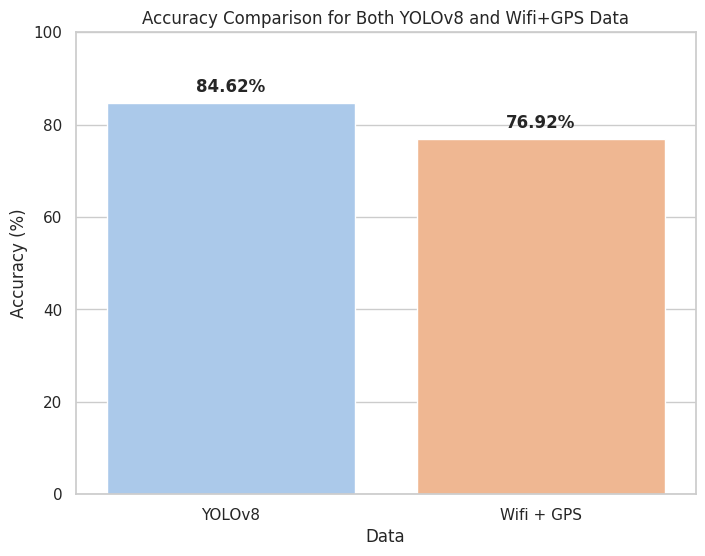

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Replace these with your actual data
label_names = ['YOLOv8', 'Wifi + GPS']
accuracy_values = [accuracy, accuracy2]  # Example accuracy values for Label A and Label B

# Set the Seaborn style
sns.set(style="whitegrid")
sns.set_palette("pastel")
plt.figure(figsize=(8, 6))

# Use Seaborn's barplot for a visually enhanced representation
ax = sns.barplot(x=label_names, y=accuracy_values)

plt.xlabel('Data')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison for Both YOLOv8 and Wifi+GPS Data')
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100 (assuming accuracy is in percentage)

# Display the accuracy values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', fontweight='bold')

plt.show()